<div class="alert alert-block alert-info">
    <h1>Análisis de Series Temporales</h1>
    <h3>Clase 8 - AutoML</h3>
    <h3>Ejercicio 2_Sincronico</h3>
        <p>Docente: Rodrigo Del Rosso<p>
        <p>Asistentes: Sebastián Calcagno, Drago Braian <p>
</div>

In [ ]:
# Se instalan las librerías
!pip install h2o
!pip install autoviz
!pip install seaborn
!pip install sweetviz
!pip install tsfresh

  Using cached seaborn-0.13.0-py3-none-any.whl (294 kB)
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
ydata-profiling 4.6.3 requires seaborn<0.13,>=0.10.1, but you have seaborn 0.13.0 which is incompatible.


In [ ]:
!pip install ydata-profiling ### <---- actualizado hace tres semanas! https://github.com/ydataai/ydata-profiling

  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.0
    Uninstalling seaborn-0.13.0:
      Successfully uninstalled seaborn-0.13.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
autoviz 0.1.734 requires seaborn>=0.13, but you have seaborn 0.12.2 which is incompatible.


In [ ]:
# Se cargan las librerías
from pandas import DataFrame
from pandas import concat
import random
from scipy import stats
import numpy as np
import pandas as pd
from math import sqrt
from numpy import concatenate
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import seaborn as sn
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import h2o
from h2o.automl import H2OAutoML
import gc
from autoviz.AutoViz_Class import AutoViz_Class
import sweetviz
from IPython.display import YouTubeVideo
from tsfresh import extract_features
import statsmodels.api as sm
#from darts import TimeSeries
#from darts.models import (NaiveSeasonal,NaiveDrift,RNNModel,Prophet,ExponentialSmoothing,ARIMA,AutoARIMA,TCNModel,TransformerModel,Theta,FFT)
%matplotlib inline

In [ ]:
from ydata_profiling import ProfileReport

No aplica para este ejemplo pero con esta [librería](https://github.com/8080labs/pyforest), se pueden importar muchas librerías en un línea de código

In [ ]:
#!pip install pyforest
#from pyforest import *

En este [link](https://github.com/MaxBenChrist/awesome_time_series_in_python) encontrarán librerías útiles para series de tiempo

# Ejemplo Dataset "Contaminación"

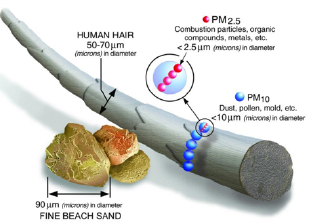

[Fuente del Dataset](https://raw.githubusercontent.com/sagarmk/Forecasting-on-Air-pollution-with-RNN-LSTM/master/pollution.csv)

Esta base de datos informa sobre el clima y el nivel de contaminación cada hora durante cinco años en la embajada de Estados Unidos ubicada en Beijing, China.  

El PM2.5 se refiere a la materia particulada atmosférica (PM µg/m3), la cual tiene una diámetro menor a 2.5 micrómetros, equivalente a aproximadamente un 3% del diámetro de un pelo humano.  Las partículas son tan pequeñas que comúnmente solo son medibles a través de microscopios de electrónicos.

Estas partículas finas provienen de diversas fuentes. Desde polvo de plantas, vehículos de motor, aviones, incendios forestales, tormentas de arena, quema agropecuaria y de agricultura, entre otros.

**¿Por qué el PM2.5 es Peligroso?**  
Debido a que son partículas tan ligeras y tan pequeñas, estas tienden a permanecer más tiempo en el aire al compararlas con otras más pesadas.  Lo anterior incrementa la probabilidad de que estas partículas sean inhaladas por personas o animales. Partículas de este tamaño, pueden entrar por la nariz, pasar por la garganta y penetrar de forma profunda en los pulmones; algunas incluso pueden llegar hasta el sistema circulatorio.  

El muestreo de aire es cualquier método para tomar un volumen representativo de aire y analizar su contaminación química, de partículas o radioactiva.  Las muestras se recolectan al vacío en un filtro o resina, se procesan más mediante limpieza del filtro, extracción o incineración, y luego se evalúan utilizando métodos gravimétricos, microscopía o equipo.

**Variables:**
*   date: fecha y hora
*   pollution: concentración de PM2.5 (Contaminación)
*   dew: punto de rocío
*   temp: temperatura
*   press: Presión
*   wnd_dir: dirección del viento
*   wnd_spd: velocidad del viento acumulada
*   snow: horas acumuladas de nieve
*   rain: horas acumuladas de lluvia





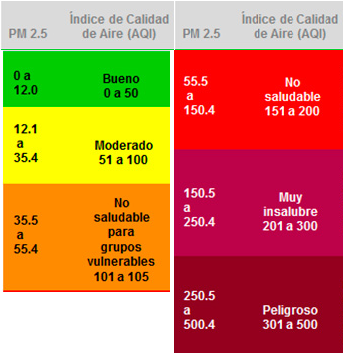

## **Análisis Exploratorio**





In [ ]:
# Se carga la base
url='https://raw.githubusercontent.com/braiandrago/AST/main/pollution.csv'
df = pd.read_csv(url,index_col=0,parse_dates=True)
df.head()

pollution  dew  temp   press wnd_dir  wnd_spd  snow  rain
date                                                                          
2010-01-02 00:00:00    129.0   -16   -4.0  1020.0    SE     1.79      0     0 
2010-01-02 01:00:00    148.0   -15   -4.0  1020.0    SE     2.68      0     0 
2010-01-02 02:00:00    159.0   -11   -5.0  1021.0    SE     3.57      0     0 
2010-01-02 03:00:00    181.0    -7   -5.0  1022.0    SE     5.36      1     0 
2010-01-02 04:00:00    138.0    -7   -5.0  1022.0    SE     6.25      2     0

In [ ]:
# Análisis exploratorio general
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43800 entries, 2010-01-02 00:00:00 to 2014-12-31 23:00:00
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pollution  43800 non-null  float64
 1   dew        43800 non-null  int64  
 2   temp       43800 non-null  float64
 3   press      43800 non-null  float64
 4   wnd_dir    43800 non-null  object 
 5   wnd_spd    43800 non-null  float64
 6   snow       43800 non-null  int64  
 7   rain       43800 non-null  int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 3.0+ MB


In [ ]:
# Análisis exploratorio por variable
df.describe()

pollution        dew          temp          press        wnd_spd    \
count  43800.000000  43800.000000  43800.000000  43800.000000  43800.000000   
mean      94.013516      1.828516     12.459041   1016.447306     23.894307   
std       92.252276     14.429326     12.193384     10.271411     50.022729   
min        0.000000    -40.000000    -19.000000    991.000000      0.450000   
25%       24.000000    -10.000000      2.000000   1008.000000      1.790000   
50%       68.000000      2.000000     14.000000   1016.000000      5.370000   
75%      132.250000     15.000000     23.000000   1025.000000     21.910000   
max      994.000000     28.000000     42.000000   1046.000000    585.600000   

           snow          rain      
count  43800.000000  43800.000000  
mean       0.052763      0.195023  
std        0.760582      1.416247  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max       27.000000     36.000000

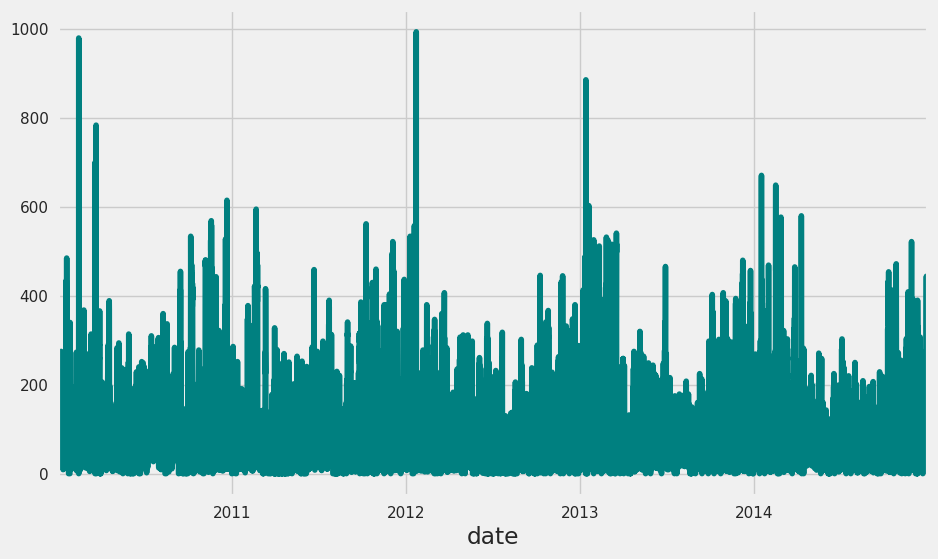

In [ ]:
# Se grafica la contaminación
ax= df['pollution'].plot(label='Contaminación', color='teal', figsize=(10, 6));

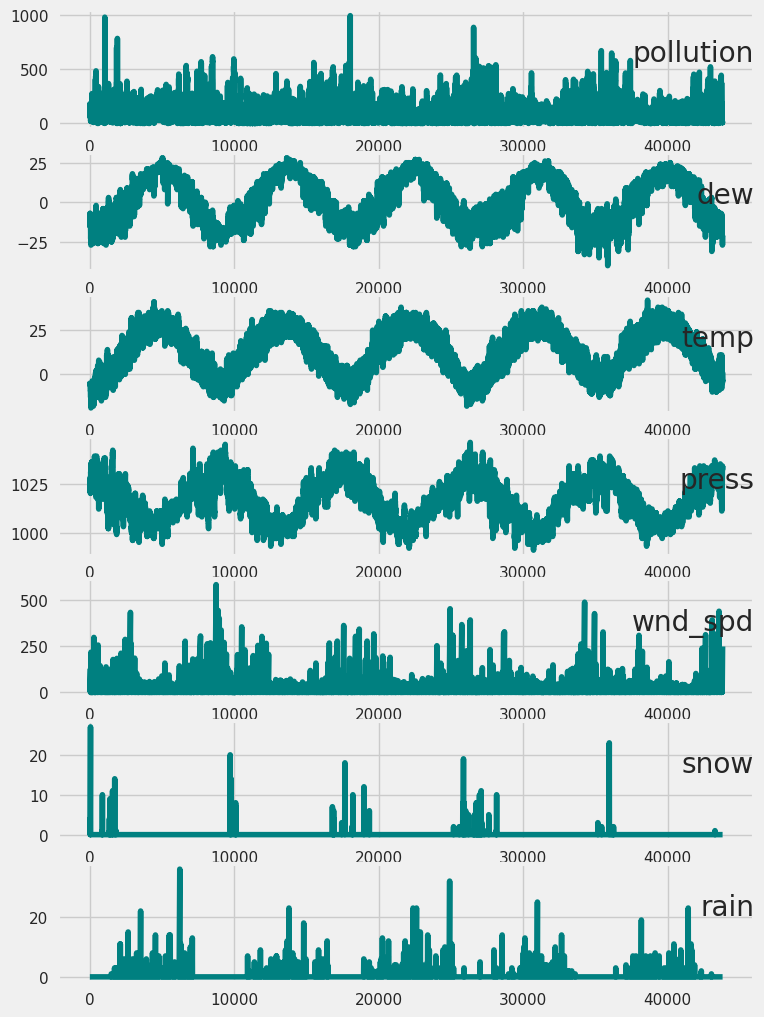

In [ ]:
# Se grafica la evolución de todas las variables
plt.figure(figsize=(8, 12))
values = df.values
groups = [0, 1, 2, 3, 5, 6, 7]
i = 1
# plot each column
#plt.figure()
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group],color='teal')
    plt.title(df.columns[group], y=0.5, loc='right')
    i += 1
plt.show()

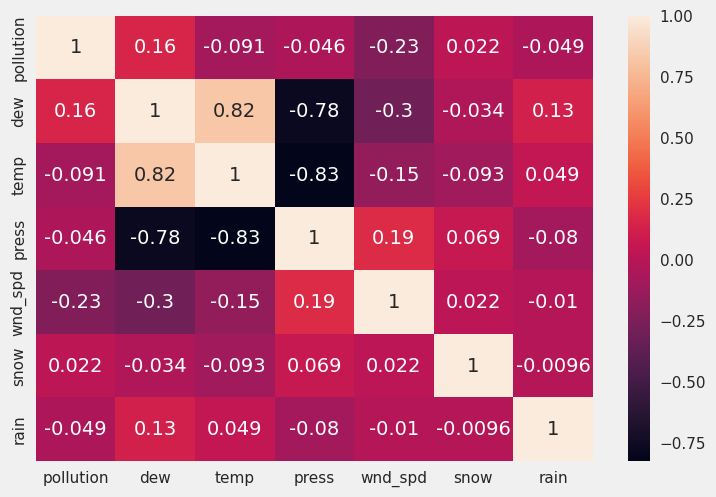

<Figure size 800x550 with 0 Axes>

In [ ]:
# Matriz de correlación
corrMatrix =df.corr()
sn.heatmap(corrMatrix, annot = True, )
plt.figure()
plt.show()

Shape of your Data Set loaded: (43800, 9)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  3
    Number of Integer-Categorical Columns =  3
    Number of String-Categorical Columns =  1
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  0
    8 Predictors classified...
        1 variable(s) removed since they were ID or low-information variables
        List of variables removed: ['date']

################ Regression problem #####################
T

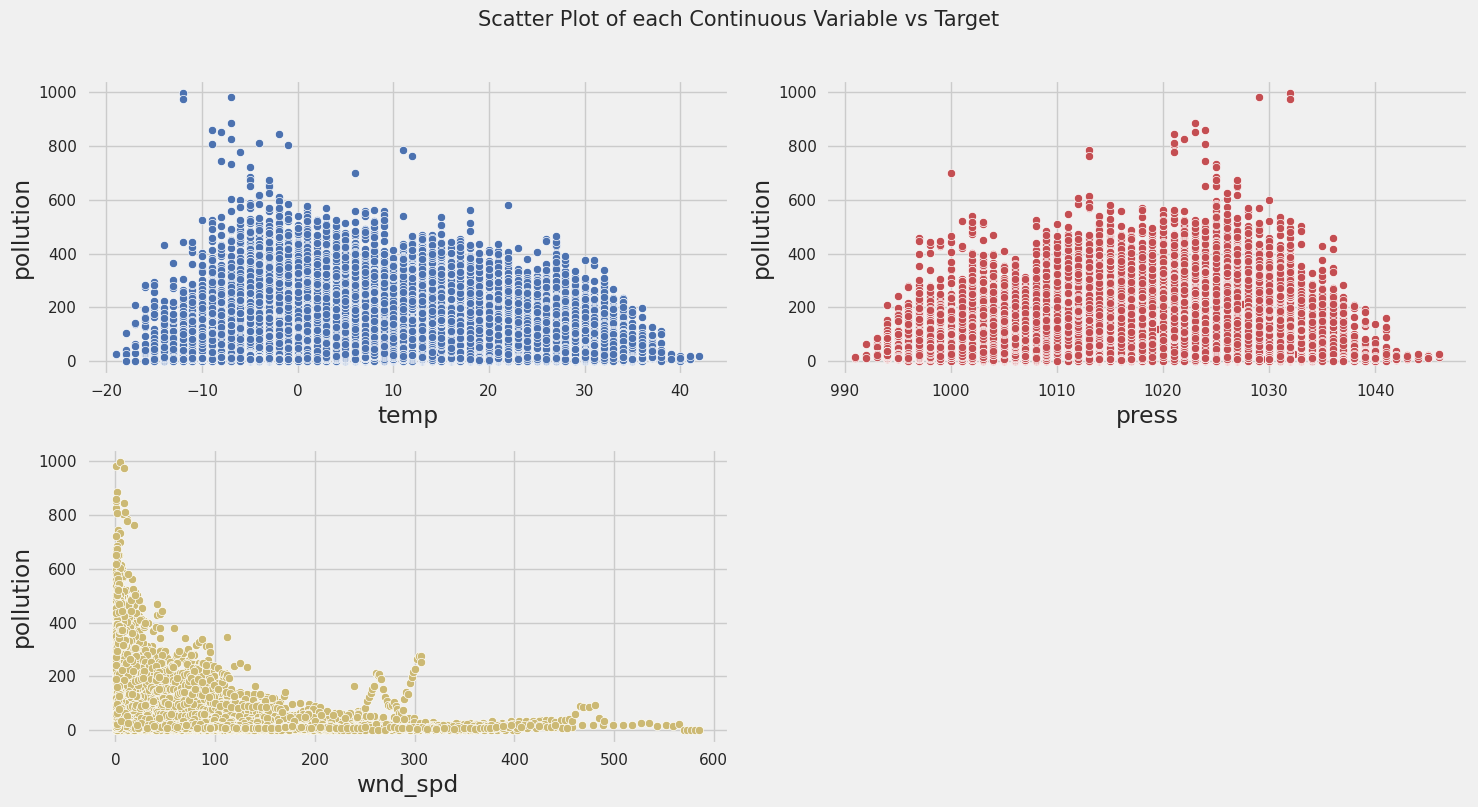

Number of All Scatter Plots = 6


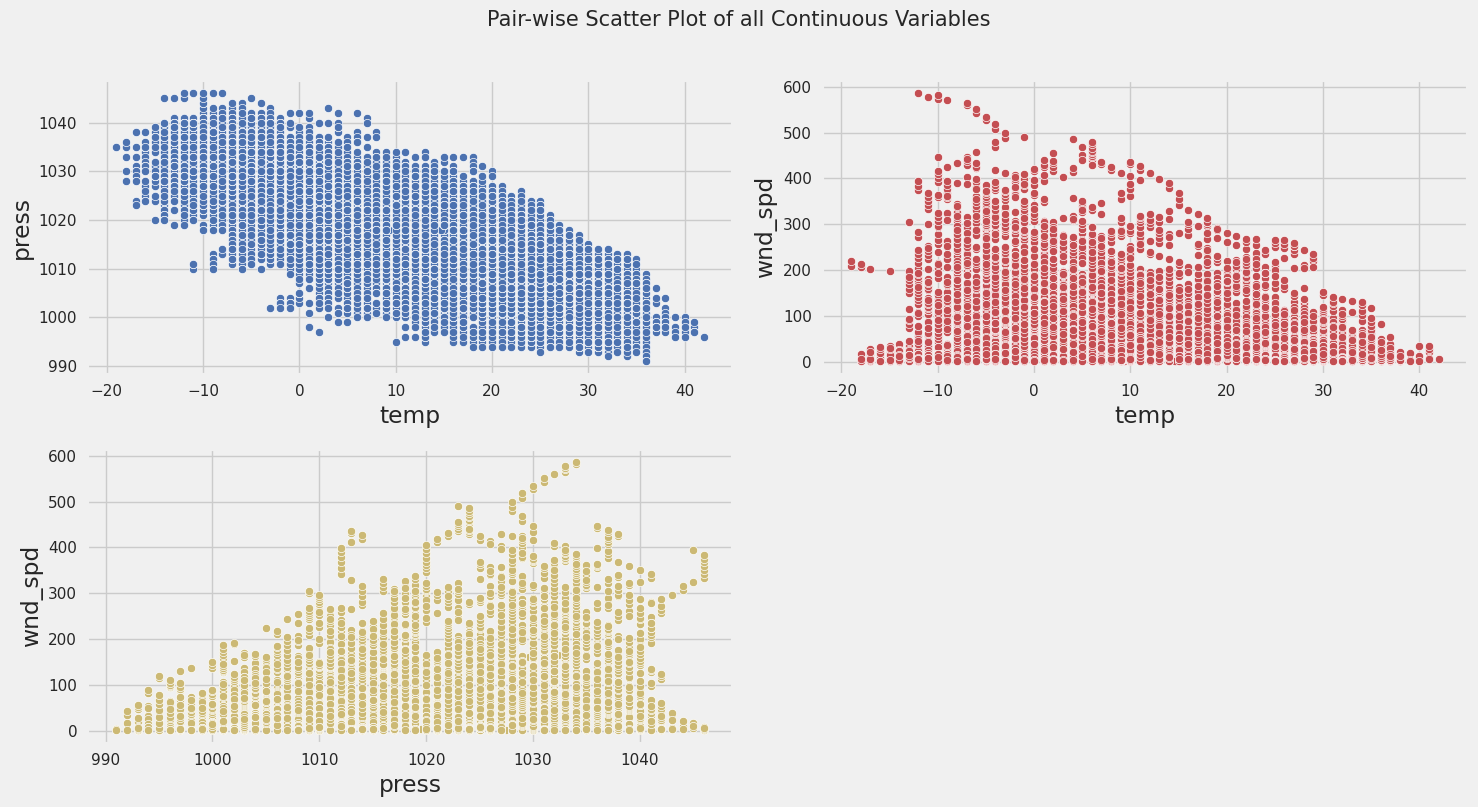

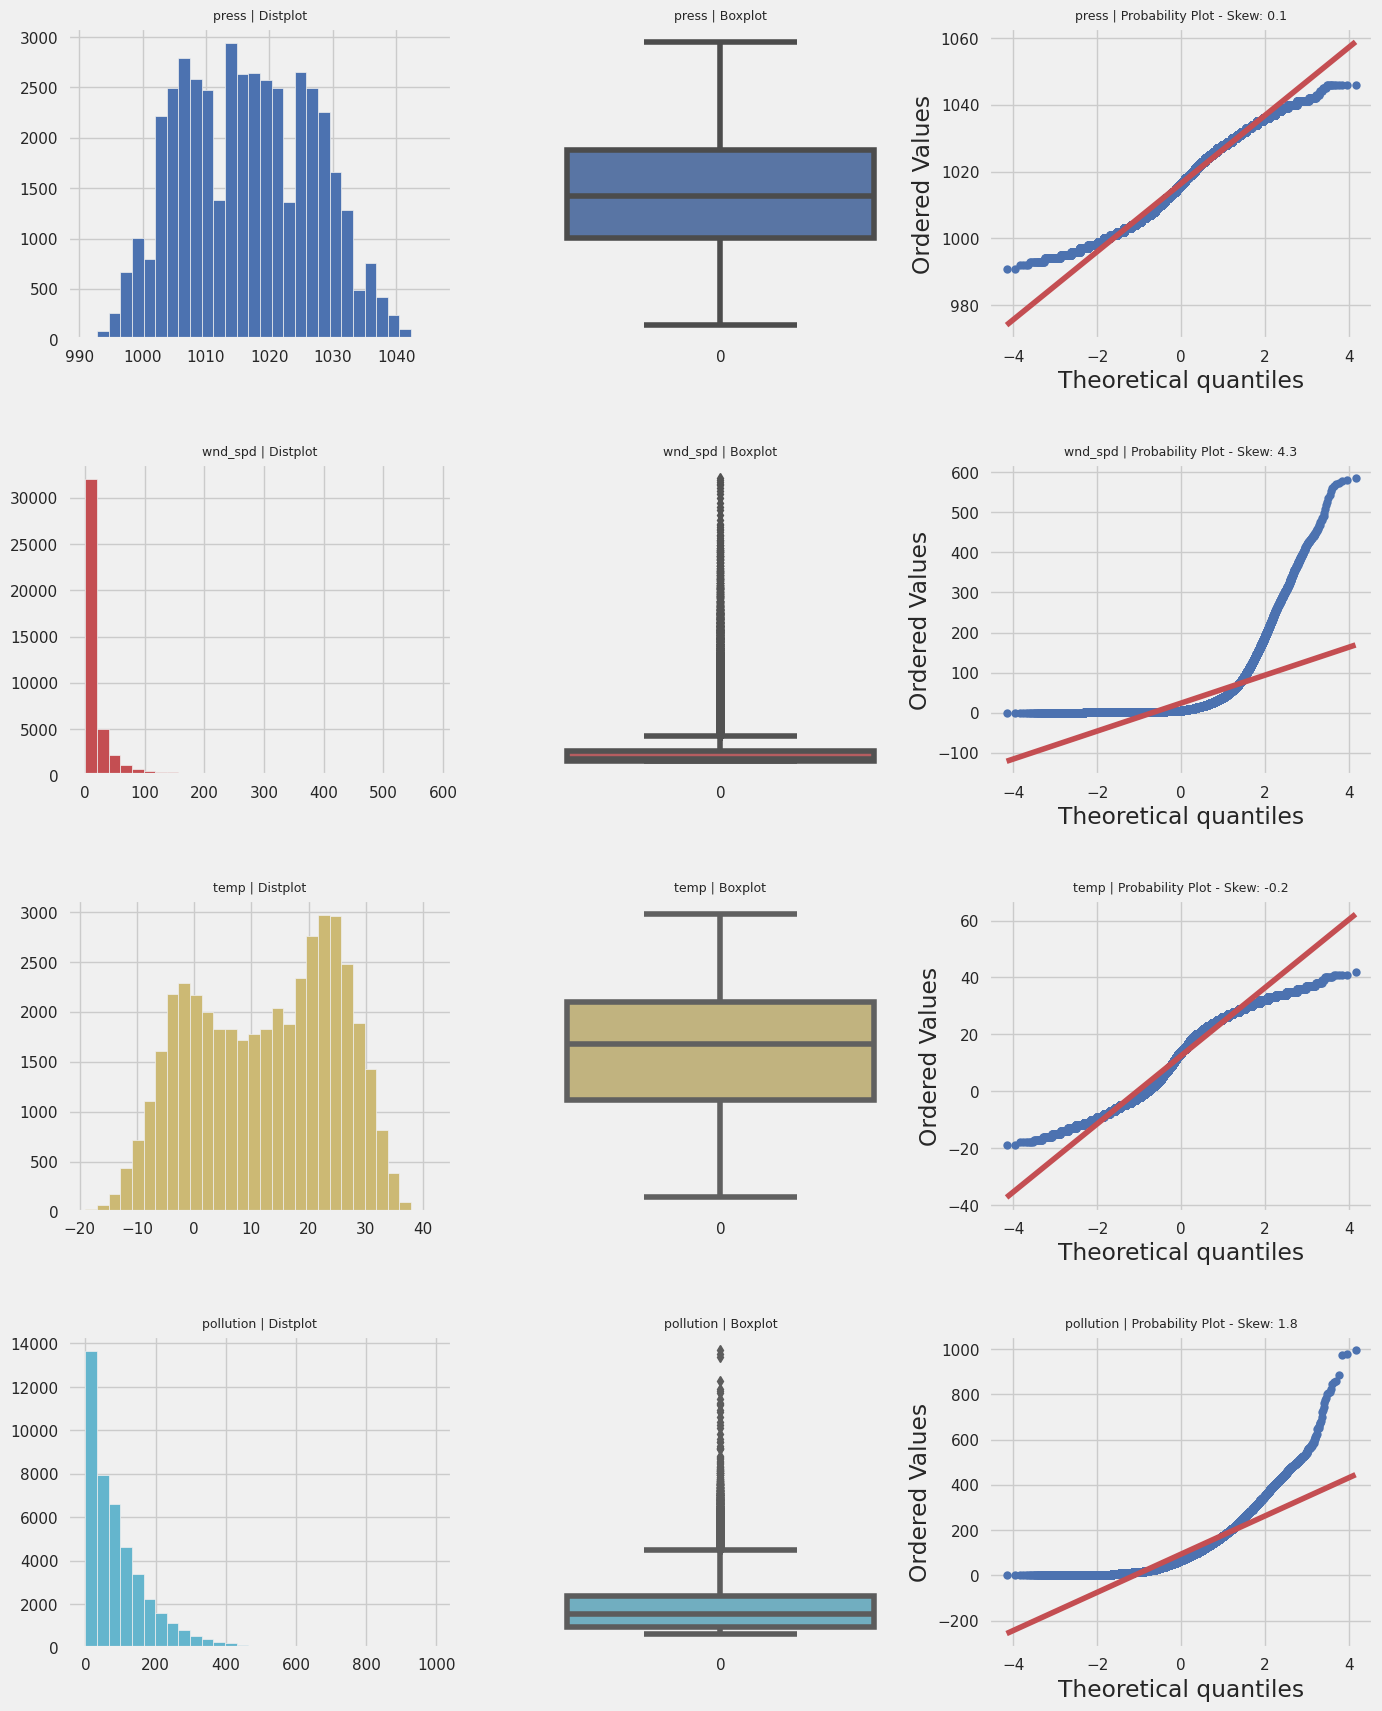

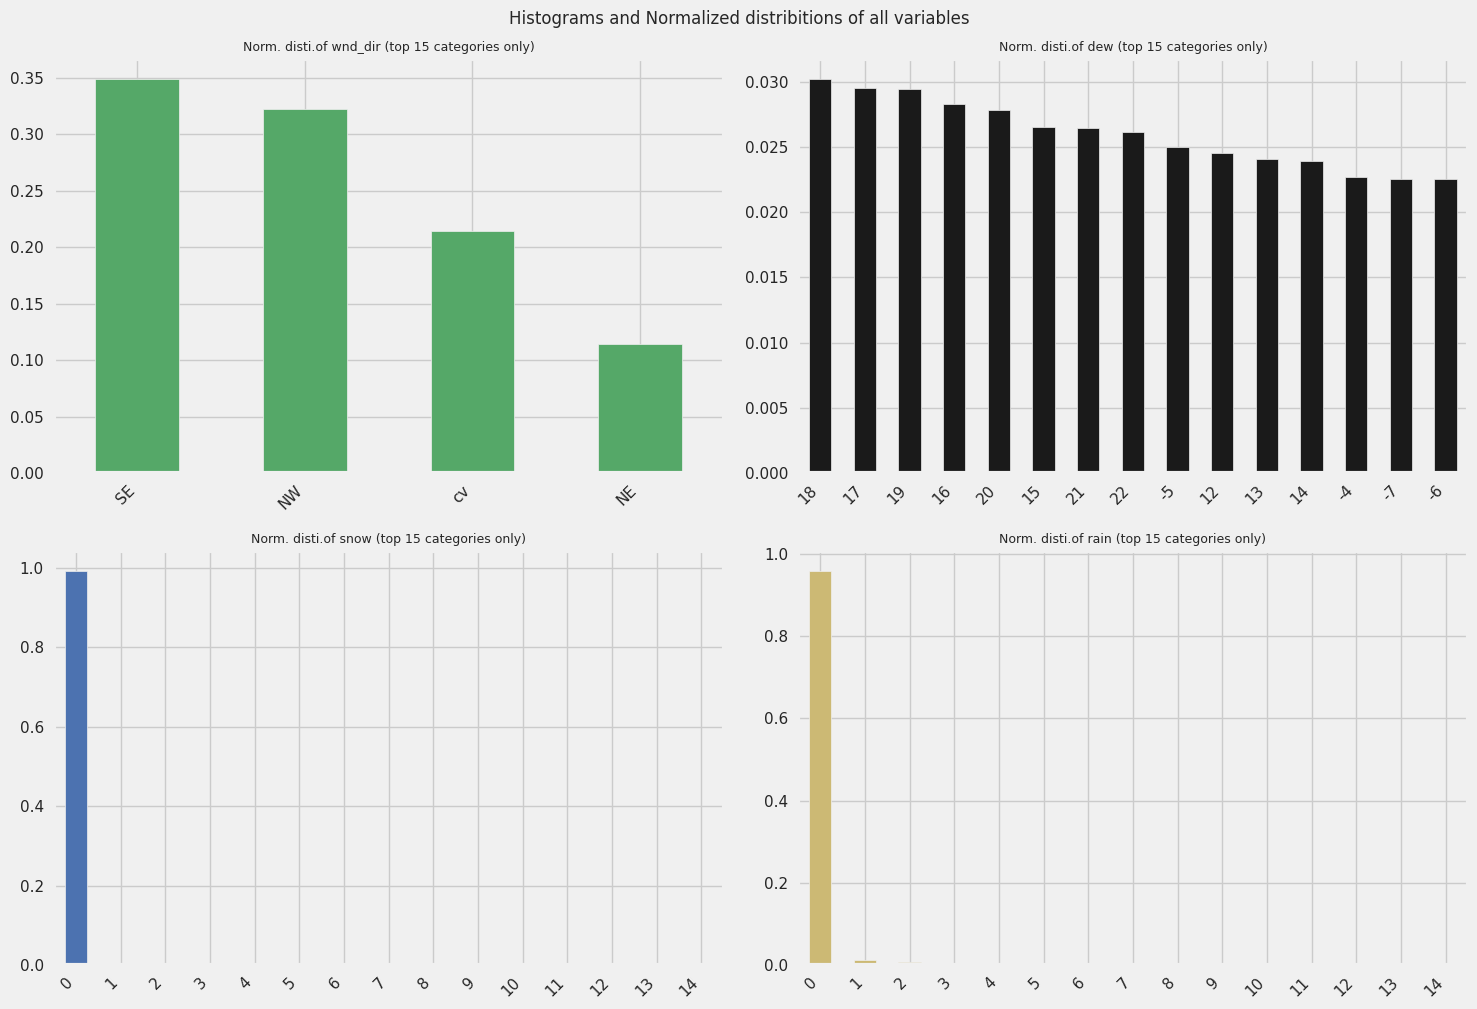

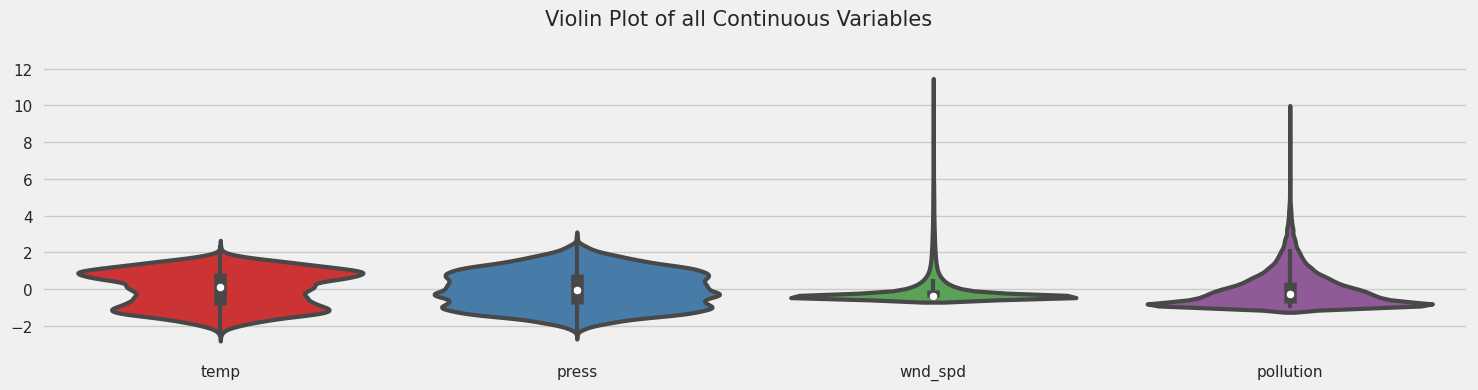

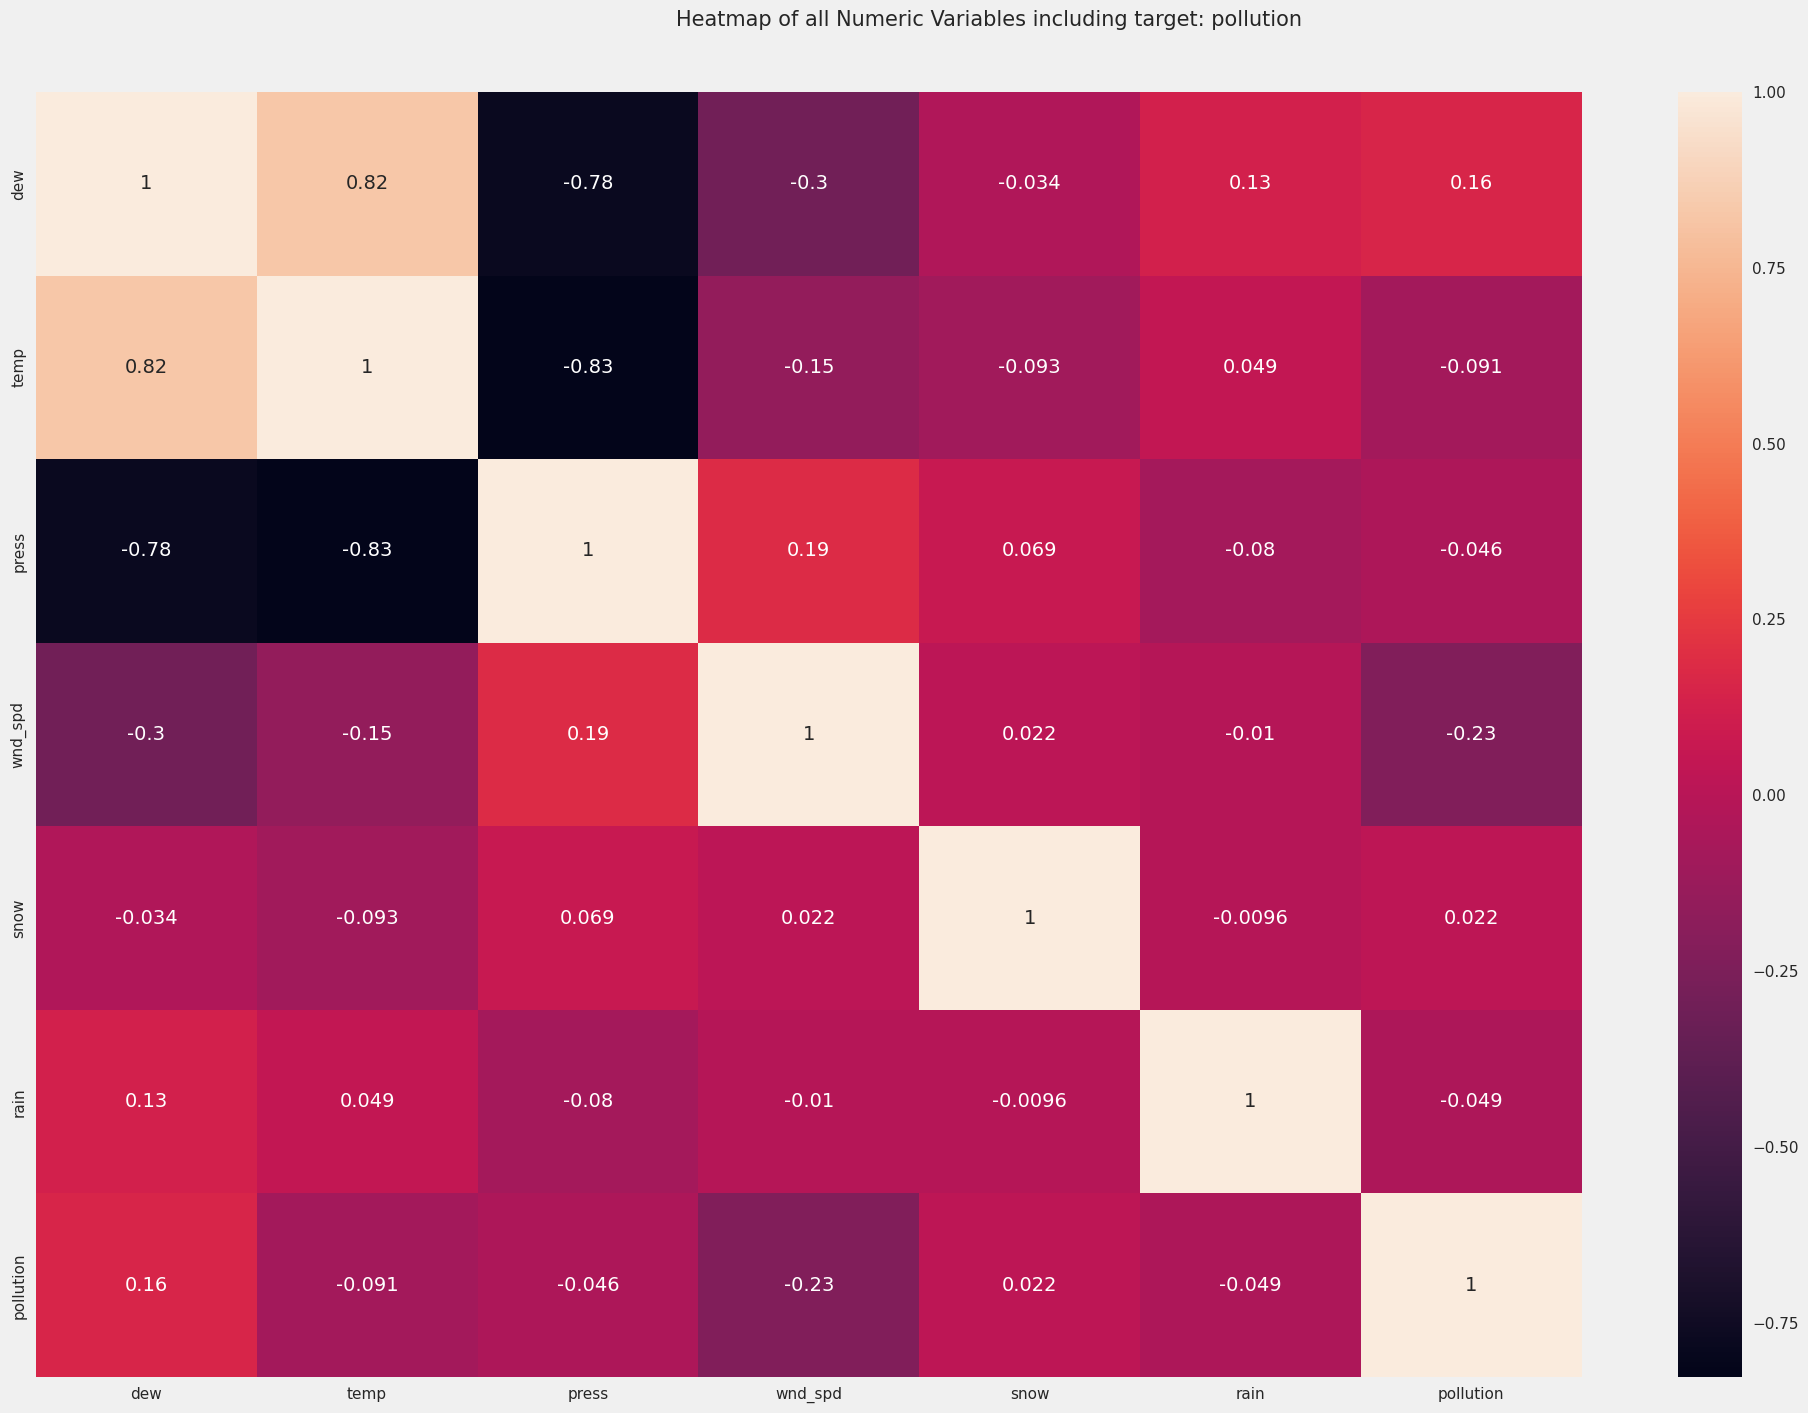

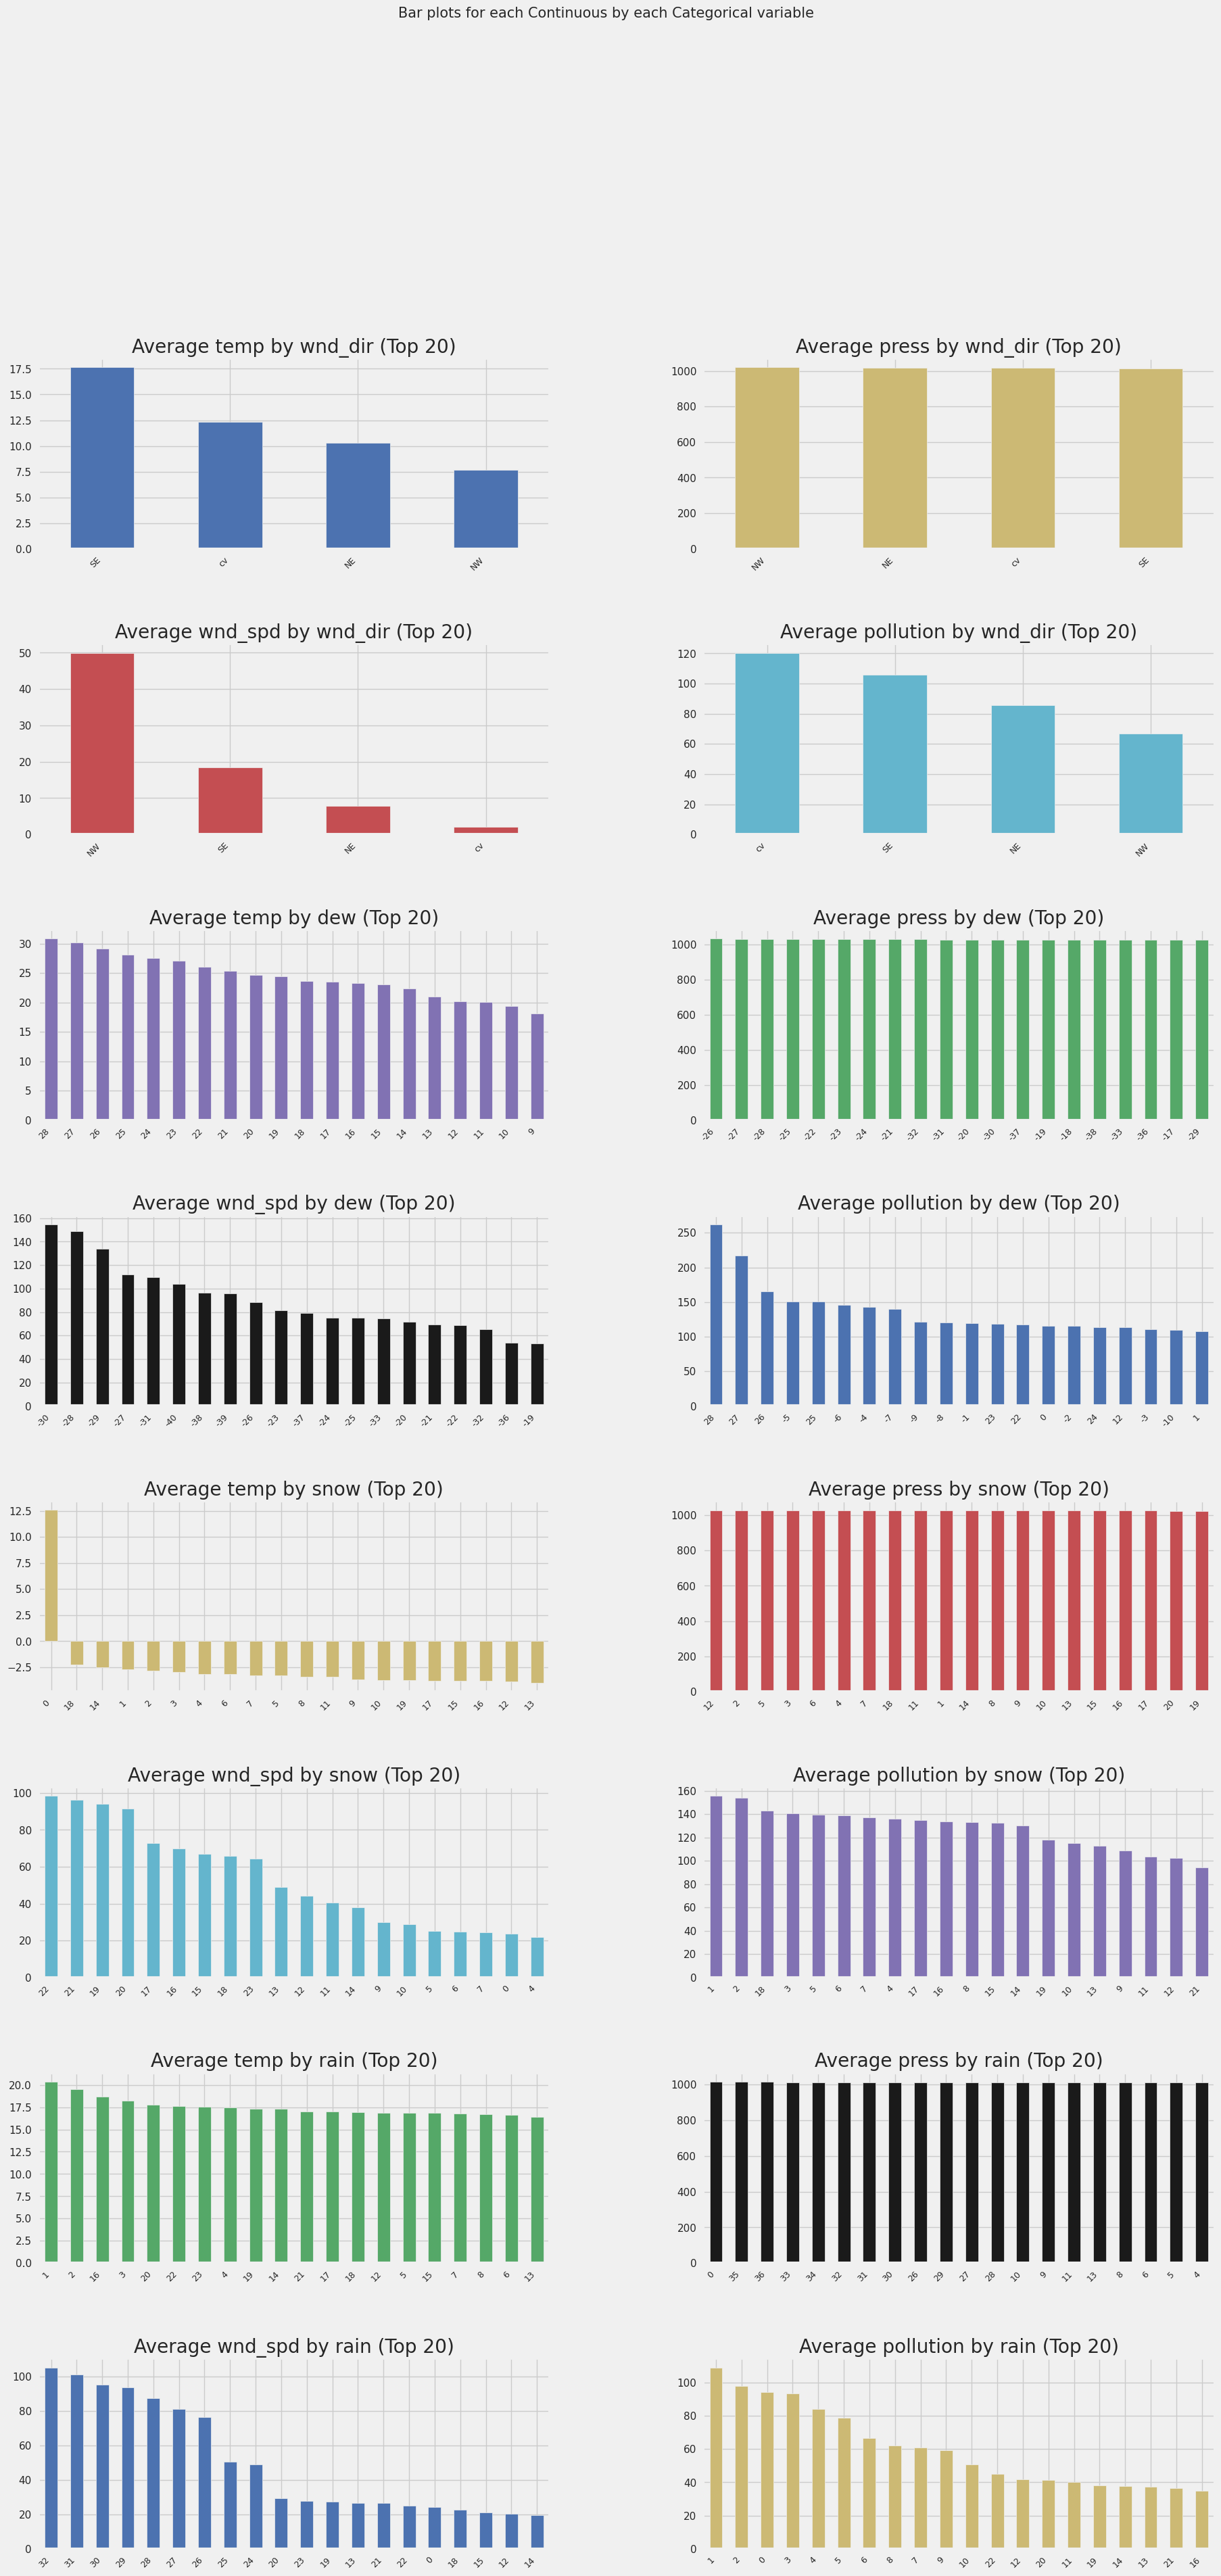

All Plots done
Time to run AutoViz = 23 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [ ]:
# Análisis exploratorio automático (gráfico)
AV = AutoViz_Class()
dataset = AV.AutoViz(url, depVar="pollution")

In [ ]:
# Análisis Exploratorio Automático 1 - AutoEDA - Pandas Profiling
profile = ProfileReport(df, title="Pandas Profiling Report")
#profile.to_file("EDA_Report.html")

In [ ]:
profile

In [ ]:
# Análisis Exploratorio Automático 2 - Auto EDA - Sweetviz
my_report = sweetviz.analyze([pd.read_csv(url),'Dataset'],target_feat="pollution")

                                             |          | [  0%]   00:00 -> (? left)

In [ ]:
# Generación del reporte
my_report.show_html("Report.html")

Report Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
from google.colab import files

# Download the report HTML file
files.download("Report.html")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **AutoML**

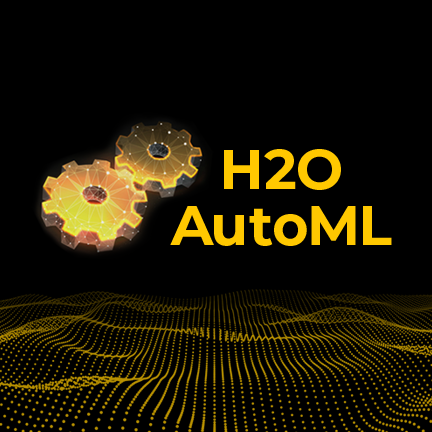

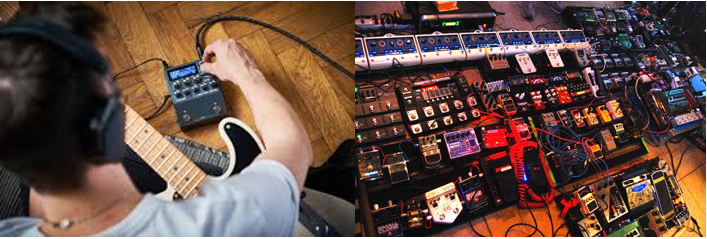

Although H2O has made it easy for non-experts to experiment with machine learning, there is still a fair bit of knowledge and background in data science that is required to produce high-performing machine learning models. Deep Neural Networks in particular are notoriously difficult for a non-expert to tune properly. In order for machine learning software to truly be accessible to non-experts, we have designed an easy-to-use interface which automates the process of training a large selection of candidate models. H2O’s AutoML can also be a helpful tool for the advanced user, by providing a simple wrapper function that performs a large number of modeling-related tasks that would typically require many lines of code, and by freeing up their time to focus on other aspects of the data science pipeline tasks such as data-preprocessing, feature engineering and model deployment.

H2O’s AutoML can be used for automating the machine learning workflow, which includes automatic training and tuning of many models within a user-specified time-limit.

**Consideraciones de esta librería:**

Tanto en la API de R como en la de Python, AutoML utiliza los mismos argumentos relacionados con los datos, x, y, marco_entrenamiento, marco_validación, que los otros algoritmos H2O. La mayoría de las veces, todo lo que se necesita hacer es especificar los argumentos de los datos. Luego es posible configurar valores para **max_runtime_secs** y/o **max_models** para establecer límites explícitos de tiempo o número de modelos en su ejecución.


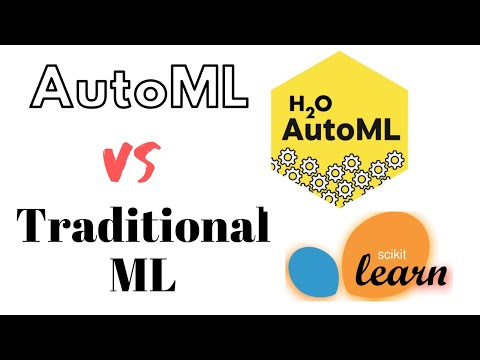

In [ ]:
# Breve introducción a AutoML
YouTubeVideo('YA_dYTNa9tc')
# https://www.youtube.com/watch?v=YA_dYTNa9tc

![picture](https://www.ericsson.com/4a949f/assets/global/qbank/2020/10/14/machine-learning-workflow-124321d41d8cd98f00b204e9800998ecf8427e.png?w=1410)

[Fuente del Ejemplo](https://github.com/SeanPLeary/time-series-h2o-automl-example/blob/master/h2o_automl_example_with_multivariate_time_series.ipynb)

Para modelar la serie temporal con métodos tradicionales de aprendizaje supervisado, se deben pre-procesar los datos. Creamos las variables lagueadas mediante la función [time_series_to_supervised](https://machinelearningmastery.com/.convert-time-series-supervised-learning-problem-python/). La función tiene los siguientes parámetros:


*   data = dataframe
*   n_lags = lags pasados
*   n_lags = lags futuros
*   selLag = selecciona una variable específica del lag pasado
*   selFut = selecciona una variable específica del lag futuro
*   dropnan = borra las líneas con NaN









In [ ]:
def time_series_to_supervised(data, n_lag=1, n_fut=1, selLag=None, selFut=None, dropnan=True):
    """
    Converts a time series to a supervised learning data set by adding time-shifted prior and future period
    data as input or output (i.e., target result) columns for each period
    :param data:  a series of periodic attributes as a list or NumPy array
    :param n_lag: number of PRIOR periods to lag as input (X); generates: Xa(t-1), Xa(t-2); min= 0 --> nothing lagged
    :param n_fut: number of FUTURE periods to add as target output (y); generates Yout(t+1); min= 0 --> no future periods
    :param selLag:  only copy these specific PRIOR period attributes; default= None; EX: ['Xa', 'Xb' ]
    :param selFut:  only copy these specific FUTURE period attributes; default= None; EX: ['rslt', 'xx']
    :param dropnan: True= drop rows with NaN values; default= True
    :return: a Pandas DataFrame of time series data organized for supervised learning
    NOTES:
    (1) The current period's data is always included in the output.
    (2) A suffix is added to the original column names to indicate a relative time reference: e.g., (t) is the current
        period; (t-2) is from two periods in the past; (t+1) is from the next period
    (3) This is an extension of Jason Brownlee's series_to_supervised() function, customized for MFI use
    """
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    origNames = df.columns
    cols, names = list(), list()
    # include all current period attributes
    cols.append(df.shift(0))
    names += [('%s' % origNames[j]) for j in range(n_vars)]

    # lag any past period attributes (t-n_lag,...,t-1)
    n_lag = max(0, n_lag)  # force valid number of lag periods
    for i in range(n_lag, 0, -1):
        suffix= '(t-%d)' % i
        if (None == selLag):   # copy all attributes from PRIOR periods?
            cols.append(df.shift(i))
            names += [('%s%s' % (origNames[j], suffix)) for j in range(n_vars)]
        else:
            for var in (selLag):
                cols.append(df[var].shift(i))
                names+= [('%s%s' % (var, suffix))]

    # include future period attributes (t+1,...,t+n_fut)
    n_fut = max(n_fut, 0)  # force valid number of future periods to shift back
    for i in range(1, n_fut + 1):
        suffix= '(t+%d)' % i
        if (None == selFut):  # copy all attributes from future periods?
            cols.append(df.shift(-i))
            names += [('%s%s' % (origNames[j], suffix)) for j in range(n_vars)]
        else:  # copy only selected future attributes
            for var in (selFut):
                cols.append(df[var].shift(-i))
                names += [('%s%s' % (var, suffix))]
    # combine everything
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values introduced by lagging
    if dropnan:
        agg.dropna(inplace=True)
    return agg


In [ ]:
# Se aplica la función time_series_to_supervised
df_processed = time_series_to_supervised(df, n_lag=1, n_fut=1 , selLag=None, selFut=['pollution'], dropnan=True)
df_processed.head()

pollution  dew  temp   press wnd_dir  wnd_spd  snow  \
date                                                                       
2010-01-02 01:00:00    148.0   -15   -4.0  1020.0    SE     2.68      0    
2010-01-02 02:00:00    159.0   -11   -5.0  1021.0    SE     3.57      0    
2010-01-02 03:00:00    181.0    -7   -5.0  1022.0    SE     5.36      1    
2010-01-02 04:00:00    138.0    -7   -5.0  1022.0    SE     6.25      2    
2010-01-02 05:00:00    109.0    -7   -6.0  1022.0    SE     7.14      3    

                     rain  pollution(t-1)  dew(t-1)  temp(t-1)  press(t-1)  \
date                                                                         
2010-01-02 01:00:00    0        129.0       -16.0      -4.0       1020.0     
2010-01-02 02:00:00    0        148.0       -15.0      -4.0       1020.0     
2010-01-02 03:00:00    0        159.0       -11.0      -5.0       1021.0     
2010-01-02 04:00:00    0        181.0        -7.0      -5.0       1022.0     
2010-01-02 05:00:00    0        138.0        -7.0      -5.0       1022.0     

                    wnd_dir(t-1)  wnd_spd(t-1)  snow(t-1)  rain(t-1)  \
date                                                                   
2010-01-02 01:00:00      SE           1.79         0.0        0.0      
2010-01-02 02:00:00      SE           2.68         0.0        0.0      
2010-01-02 03:00:00      SE           3.57         0.0        0.0      
2010-01-02 04:00:00      SE           5.36         1.0        0.0      
2010-01-02 05:00:00      SE           6.25         2.0        0.0      

                     pollution(t+1)  
date                                 
2010-01-02 01:00:00       159.0      
2010-01-02 02:00:00       181.0      
2010-01-02 03:00:00       138.0      
2010-01-02 04:00:00       109.0      
2010-01-02 05:00:00       105.0

In [ ]:
# Separación en entrenamiento (80%) y testeo (20%)
df_processed.reset_index(drop=True,inplace=True) # reseteo el índice
df_train = df_processed.loc[:int(df_processed.shape[0]*0.8),:]
df_test = df_processed.loc[int(df_processed.shape[0]*0.8):,:]

In [ ]:
# Visualziación de la base de entrenamiento
df_train.head()

pollution  dew  temp   press wnd_dir  wnd_spd  snow  rain  pollution(t-1)  \
0    148.0   -15   -4.0  1020.0    SE     2.68      0     0        129.0       
1    159.0   -11   -5.0  1021.0    SE     3.57      0     0        148.0       
2    181.0    -7   -5.0  1022.0    SE     5.36      1     0        159.0       
3    138.0    -7   -5.0  1022.0    SE     6.25      2     0        181.0       
4    109.0    -7   -6.0  1022.0    SE     7.14      3     0        138.0       

   dew(t-1)  temp(t-1)  press(t-1) wnd_dir(t-1)  wnd_spd(t-1)  snow(t-1)  \
0   -16.0      -4.0       1020.0        SE           1.79         0.0      
1   -15.0      -4.0       1020.0        SE           2.68         0.0      
2   -11.0      -5.0       1021.0        SE           3.57         0.0      
3    -7.0      -5.0       1022.0        SE           5.36         1.0      
4    -7.0      -5.0       1022.0        SE           6.25         2.0      

   rain(t-1)  pollution(t+1)  
0     0.0          159.0      
1     0.0          181.0      
2     0.0          138.0      
3     0.0          109.0      
4     0.0          105.0

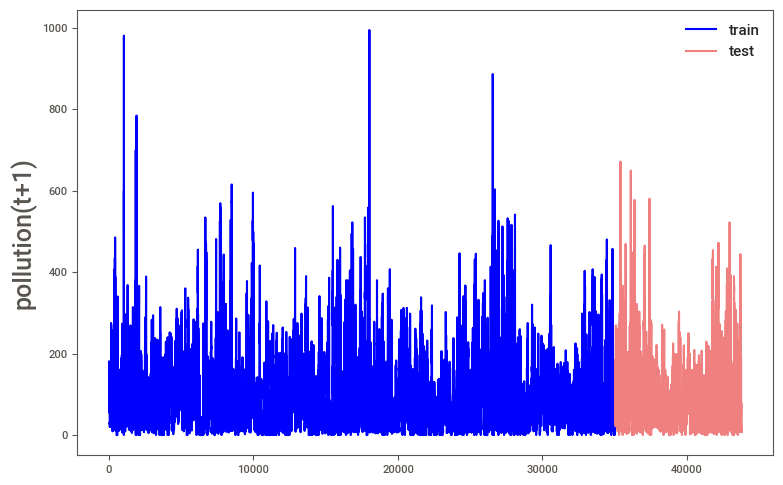

In [ ]:
# Se grafican las bases de entrenamiento y testeo juntas
plt.plot(df_train.index,df_train['pollution(t+1)'],color='blue')
plt.plot(df_test.index,df_test['pollution(t+1)'],color='lightcoral')
plt.ylabel('pollution(t+1)',fontsize=18)
plt.legend(['train','test'])
plt.show()

Se utiliza la librería H2O para el modelado.

[Documentación de H2O](https://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html)

[Breve Introducción a H2O](https://www.datacamp.com/community/tutorials/h2o-automl?utm_source=adwords_ppc&utm_campaignid=1455363063&utm_adgroupid=65083631748&utm_device=c&utm_keyword=&utm_matchtype=b&utm_network=s&utm_adpostion=&utm_creative=278443377086&utm_targetid=aud-763347114660:dsa-429603003980&utm_loc_interest_ms=&utm_loc_physical_ms=1000073&gclid=CjwKCAjwtpGGBhBJEiwAyRZX2ibtKYEghiaov8V72GeEZ5pd8KmeyWlT-IIdYtQxk4RfPE-7h4KQLBoCP8sQAvD_BwE)

In [ ]:
# Se inicializa la sesión
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.20.1" 2023-08-24; OpenJDK Runtime Environment (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp2o2_l7q0
  JVM stdout: /tmp/tmp2o2_l7q0/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp2o2_l7q0/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         06 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.44.0.2
H2O_cluster_version_age:    12 days
H2O_cluster_name:           H2O_from_python_unknownUser_71hfe8
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.170 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

In [ ]:
# Se convierten los dataframe de pandas en h2o frames
hf_train = h2o.H2OFrame(df_train)
hf_test = h2o.H2OFrame(df_test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
# Análisis exploratorio del h2o frame de entrenamiento
hf_train.describe()

Rows:35039
Cols:17

pollution          dew                 temp                press               wnd_dir    wnd_spd             snow                  rain                 pollution(t-1)     dew(t-1)            temp(t-1)           press(t-1)          wnd_dir(t-1)    wnd_spd(t-1)       snow(t-1)             rain(t-1)            pollution(t+1)
-------  -----------------  ------------------  ------------------  ------------------  ---------  ------------------  --------------------  -------------------  -----------------  ------------------  ------------------  ------------------  --------------  -----------------  --------------------  -------------------  -----------------
type     int                int                 int                 real                enum       real                int                   int                  int                int                 int                 real                enum            real               int                   int                  int
mins     0.0                -33.0               -19.0               991.0                          0.45                0.0                   0.0                  0.0                -33.0               -19.0               991.0                               0.45               0.0                   0.0                  0.0
mean     93.35837209966049  1.773109963183872   12.154370843916785  1016.3996404007004             24.963884528667965  0.057478809326750153  0.20988041896172863  93.36139730015174  1.773224121692951   12.154056908016868  1016.3998116384574                  24.96000656411427  0.057478809326750153  0.20988041896172863  93.35483318587804
maxs     994.0              28.0                41.0                1046.0                         585.6               27.0                  36.0                 994.0              28.0                41.0                1046.0                              585.6              27.0                  36.0                 994.0
sigma    91.90981126115078  14.494809359874703  12.306906922191068  10.386335259832615             51.316324996508314  0.7738490378684302    1.4899490055843665   91.90923984452935  14.494653624689587  12.30717870443259   10.38634515672728                   51.31294167537916  0.7738490378684302    1.4899490055843665   91.9100945289003
zeros    1946               636                 882                 0                              0                   34708                 33523                1946               636                 882                 0                                   0                  34708                 33523                1946
missing  0                  0                   0                   0                   0          0                   0                     0                    0                  0                   0                   0                   0               0                  0                     0                    0
0        148.0              -15.0               -4.0                1020.0              SE         2.68                0.0                   0.0                  129.0              -16.0               -4.0                1020.0              SE              1.79               0.0                   0.0                  159.0
1        159.0              -11.0               -5.0                1021.0              SE         3.57                0.0                   0.0                  148.0              -15.0               -4.0                1020.0              SE              2.68               0.0                   0.0                  181.0
2        181.0              -7.0                -5.0                1022.0              SE         5.36                1.0                   0.0                  159.0              -11.0               -5.0                1021.0              SE              3.57               0.0                   0.0                  138.0
3        138.0              -7.0                -5.0                1022.0

In [ ]:
# Se define el target y la base de entrenamiento
y = 'pollution(t+1)'
X = hf_train.columns
X.remove(y)

In [ ]:
# Configuración de los parámetros de entrenamiento
aml = H2OAutoML(max_runtime_secs = 180,seed = 42, verbosity="info", exclude_algos=['StackedEnsemble']) # Se excluyeron los ensambles
# Inicio del entrenamiento
aml.train(x = X,
          y = y,
          training_frame = hf_train,
          leaderboard_frame = hf_test)

AutoML progress: |
22:52:56.262: Project: AutoML_1_20231120_225256
22:52:56.268: 5-fold cross-validation will be used.
22:52:56.268: Setting stopping tolerance adaptively based on the training frame: 0.005342249270903391
22:52:56.270: Build control seed: 42
22:52:56.271: training frame: Frame key: AutoML_1_20231120_225256_training_Key_Frame__upload_b8f1102129fff5fd44b6323e762c41fa.hex    cols: 17    rows: 35039  chunks: 1    size: 858396  checksum: 2695093165254559864
22:52:56.272: validation frame: NULL
22:52:56.272: leaderboard frame: Frame key: Key_Frame__upload_8007a96f8150c8314110e795df684790.hex    cols: 17    rows: 8760  chunks: 1    size: 181444  checksum: 8421467697225063246
22:52:56.272: blending frame: NULL
22:52:56.273: response column: pollution(t+1)
22:52:56.273: fold column: null
22:52:56.273: weights column: null
22:52:56.321: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (6g, 30w)]}, {GLM : [def_1 (

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_1_AutoML_1_20231120_225256


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    67                 67                          146040                 12           15           14.6418       45            215           168.463

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 588.3816790405673
RMSE: 24.25658011840431
MAE: 12.225868694406675
RMSLE: NaN
Mean Residual Deviance: 588.3816790405673

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 706.1248975447016
RMSE: 26.573010697786987
MAE: 13.38623353250302
RMSLE: NaN
Mean Residual Deviance: 706.1248975447016

Cross-Validation Metrics Summary: 
                        mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------
mae                     13.3953   0.283968    13.2073       13.7768       13.6194       13.2331       13.1401
mean_residual_deviance  706.643   48.8167     652.553       782.137       694.154       721.046       683.326
mse                     706.643   48.8167     652.553       782.137       694.154       721.046       683.326
r2                      0.916335  0.00595647  0.922617      0.90701       0.917088      0.914998      0.919961
residual_deviance       706.643   48.8167     652.553       782.137       694.154       721.046       683.326
rmse                    26.5703   0.910386    25.5451       27.9667       26.3468       26.8523       26.1405
rmsle                   nan       0           nan           nan           nan           nan           nan

Scoring History: 
    timestamp            duration          number_of_trees    training_rmse    training_mae    training_deviance
--  -------------------  ----------------  -----------------  ---------------  --------------  -------------------
    2023-11-20 22:54:49  57.116 sec        0                  91.9088          69.0282         8447.22
    2023-11-20 22:54:49  58.025 sec        5                  58.5221          43.2642         3424.84
    2023-11-20 22:54:50  58.979 sec        10                 41.4959          29.3611         1721.91
    2023-11-20 22:54:51  59.793 sec        15                 32.5299          21.2606         1058.19
    2023-11-20 22:54:52  1 min  0.562 sec  20                 28.8159          17.3088         830.354
    2023-11-20 22:54:53  1 min  1.444 sec  25                 26.7403          14.8408         715.043
    2023-11-20 22:54:54  1 min  2.295 sec  30                 25.8738          13.6806         669.452
    2023-11-20 22:54:55  1 min  3.139 sec  35                 25.4066          13.0973         645.493
    2023-11-20 22:54:56  1 min  4.840 sec  40                 25.089           12.7473         629.457
    2023-11-20 22:54:57  1 min  5.721 sec  45                 24.8566          12.5547         617.849
    2023-11-20 22:54:58  1 min  6.306 sec  50                 24.6908          12.4355         609.635
    2023-11-20 22:54:58  1 min  6.887 sec  55                 24.5349          12.3536         601.961
    2023-11-20 22:54:59  1 min  7.362 sec  60                 24.4092          12.2856         595.808
    2023-11-20 22:54:59  1 min  7.807 sec  65                 24.294           12.2415         590.197
    2023-11-20 22:54:59  1 min  8.013 sec  67                 24.2566          12.2259         588.382

Variable Importances: 
variable        relative_importance    scaled_importance    percentage
--------------  ---------------------  -------------------  ------------
pollution       1.07908e+

In [ ]:
# Listado de los modelos ganadores
lb = aml.leaderboard
lb

model_id                               rmse       mse      mae       rmsle    mean_residual_deviance
----------------------------------  -------  --------  -------  ----------  ------------------------
GBM_1_AutoML_1_20231120_225256      23.5181   553.103  12.4141  nan                          553.103
GLM_1_AutoML_1_20231120_225256      24.176    584.48   13.0293  nan                          584.48
XGBoost_1_AutoML_1_20231120_225256  24.5618   603.282  13.8569  nan                          603.282
DRF_1_AutoML_1_20231120_225256      27.2659   743.429  15.1234    0.471966                   743.429
GBM_4_AutoML_1_20231120_225256      29.5108   870.89   19.5314    0.624469                   870.89
GBM_2_AutoML_1_20231120_225256      31.1339   969.318  21.0118    0.648072                   969.318
GBM_3_AutoML_1_20231120_225256      32.7285  1071.16   22.2061    0.660893                  1071.16
XGBoost_2_AutoML_1_20231120_225256  40.0295  1602.36   26.0927  nan                         1602.36
[8 rows x 6 columns]

El modelo ganador es un Gradient Boosting, se elije aquel modelo que tenga mejores medidas de precisión. Definición de las medidas de precisión:

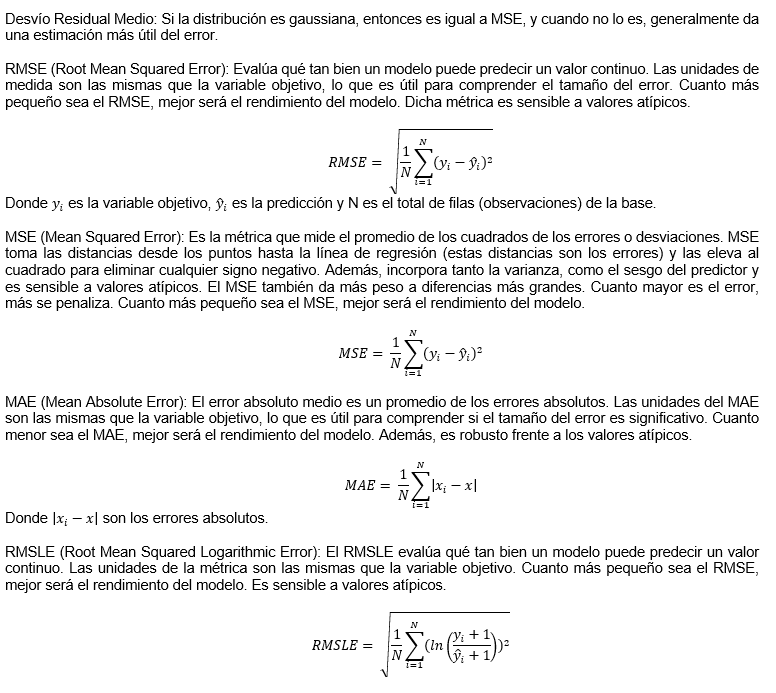

Info adicional de medidas de precisión: [link1](https://stats.stackexchange.com/questions/194453/interpreting-accuracy-results-for-an-arima-model-fit) [link2](https://www.youtube.com/watch?v=KzHJXdFJSIQ)

In [ ]:
# Se elige el modelo ganador
leader_model = aml.leader

In [ ]:
# Se realizan las predicciones en la base de testeo
hf_test_predict = leader_model.predict(hf_test)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [ ]:
# Previsualización de las predicciones
hf_test_predict.head(5)

predict
---------
  21.8284
  23.58
  49.1138
  62.4314
  64.7809
[5 rows x 1 column]

In [ ]:
# Predicción vs Valores Reales
df_results = pd.DataFrame()
df_results['ground_truth'] = df_test['pollution(t+1)'].reset_index(drop=True) # valores reales
df_results['predictions'] = h2o.as_list(hf_test_predict,use_pandas=True) # predicciones
df_results.head()

ground_truth  predictions
0      24.0       21.828431 
1      53.0       23.579972 
2      65.0       49.113820 
3      70.0       62.431382 
4      79.0       64.780879

In [ ]:
# Medidas de precisión
perf = aml.leader.model_performance(hf_test)
perf

ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 553.1028206956494
RMSE: 23.518138121366015
MAE: 12.414123982383224
RMSLE: NaN
Mean Residual Deviance: 553.1028206956494

In [ ]:
# Listado de modelos
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
model_ids

['GBM_1_AutoML_1_20231120_225256',
 'GLM_1_AutoML_1_20231120_225256',
 'XGBoost_1_AutoML_1_20231120_225256',
 'DRF_1_AutoML_1_20231120_225256',
 'GBM_4_AutoML_1_20231120_225256',
 'GBM_2_AutoML_1_20231120_225256',
 'GBM_3_AutoML_1_20231120_225256',
 'XGBoost_2_AutoML_1_20231120_225256']

**DRF** = Distributed Random Forest  
**GBM** = Gradient Boosting Machine   
**XRT** = Extremely randomized trees  
**GLM** = Generalized Linear Model

In [ ]:
# Modelo ganador
h2o.get_model([mid for mid in model_ids if "GBM_1" in mid][0])

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_1_AutoML_1_20231120_225256


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    67                 67                          146040                 12           15           14.6418       45            215           168.463

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 588.3816790405673
RMSE: 24.25658011840431
MAE: 12.225868694406675
RMSLE: NaN
Mean Residual Deviance: 588.3816790405673

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 706.1248975447016
RMSE: 26.573010697786987
MAE: 13.38623353250302
RMSLE: NaN
Mean Residual Deviance: 706.1248975447016

Cross-Validation Metrics Summary: 
                        mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------
mae                     13.3953   0.283968    13.2073       13.7768       13.6194       13.2331       13.1401
mean_residual_deviance  706.643   48.8167     652.553       782.137       694.154       721.046       683.326
mse                     706.643   48.8167     652.553       782.137       694.154       721.046       683.326
r2                      0.916335  0.00595647  0.922617      0.90701       0.917088      0.914998      0.919961
residual_deviance       706.643   48.8167     652.553       782.137       694.154       721.046       683.326
rmse                    26.5703   0.910386    25.5451       27.9667       26.3468       26.8523       26.1405
rmsle                   nan       0           nan           nan           nan           nan           nan

Scoring History: 
    timestamp            duration          number_of_trees    training_rmse    training_mae    training_deviance
--  -------------------  ----------------  -----------------  ---------------  --------------  -------------------
    2023-11-20 22:54:49  57.116 sec        0                  91.9088          69.0282         8447.22
    2023-11-20 22:54:49  58.025 sec        5                  58.5221          43.2642         3424.84
    2023-11-20 22:54:50  58.979 sec        10                 41.4959          29.3611         1721.91
    2023-11-20 22:54:51  59.793 sec        15                 32.5299          21.2606         1058.19
    2023-11-20 22:54:52  1 min  0.562 sec  20                 28.8159          17.3088         830.354
    2023-11-20 22:54:53  1 min  1.444 sec  25                 26.7403          14.8408         715.043
    2023-11-20 22:54:54  1 min  2.295 sec  30                 25.8738          13.6806         669.452
    2023-11-20 22:54:55  1 min  3.139 sec  35                 25.4066          13.0973         645.493
    2023-11-20 22:54:56  1 min  4.840 sec  40                 25.089           12.7473         629.457
    2023-11-20 22:54:57  1 min  5.721 sec  45                 24.8566          12.5547         617.849
    2023-11-20 22:54:58  1 min  6.306 sec  50                 24.6908          12.4355         609.635
    2023-11-20 22:54:58  1 min  6.887 sec  55                 24.5349          12.3536         601.961
    2023-11-20 22:54:59  1 min  7.362 sec  60                 24.4092          12.2856         595.808
    2023-11-20 22:54:59  1 min  7.807 sec  65                 24.294           12.2415         590.197
    2023-11-20 22:54:59  1 min  8.013 sec  67                 24.2566          12.2259         588.382

Variable Importances: 
variable        relative_importance    scaled_importance    percentage
--------------  ---------------------  -------------------  ------------
pollution       1.07908e+

In [ ]:
out = h2o.get_model([mid for mid in model_ids if "GBM_1" in mid][0])

In [ ]:
# Parámetros del modelo ganador
out.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'GBM_1_AutoML_1_20231120_225256',
   'type': 'Key<Model>',
   'URL': '/3/Models/GBM_1_AutoML_1_20231120_225256'},
  'input': None},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_1_20231120_225256_training_Key_Frame__upload_b8f1102129fff5fd44b6323e762c41fa.hex',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_1_20231120_225256_training_Key_Frame__upload_b8f1102129fff5fd44b6323e762c41fa.hex'},
  'input': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_1_20231120_225256_training_Key_Frame__upload_b8f1102129fff5fd44b6323e762c41fa.hex',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_1_20231120_225256_training_Key_Frame__upload_b8f1102129ff

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

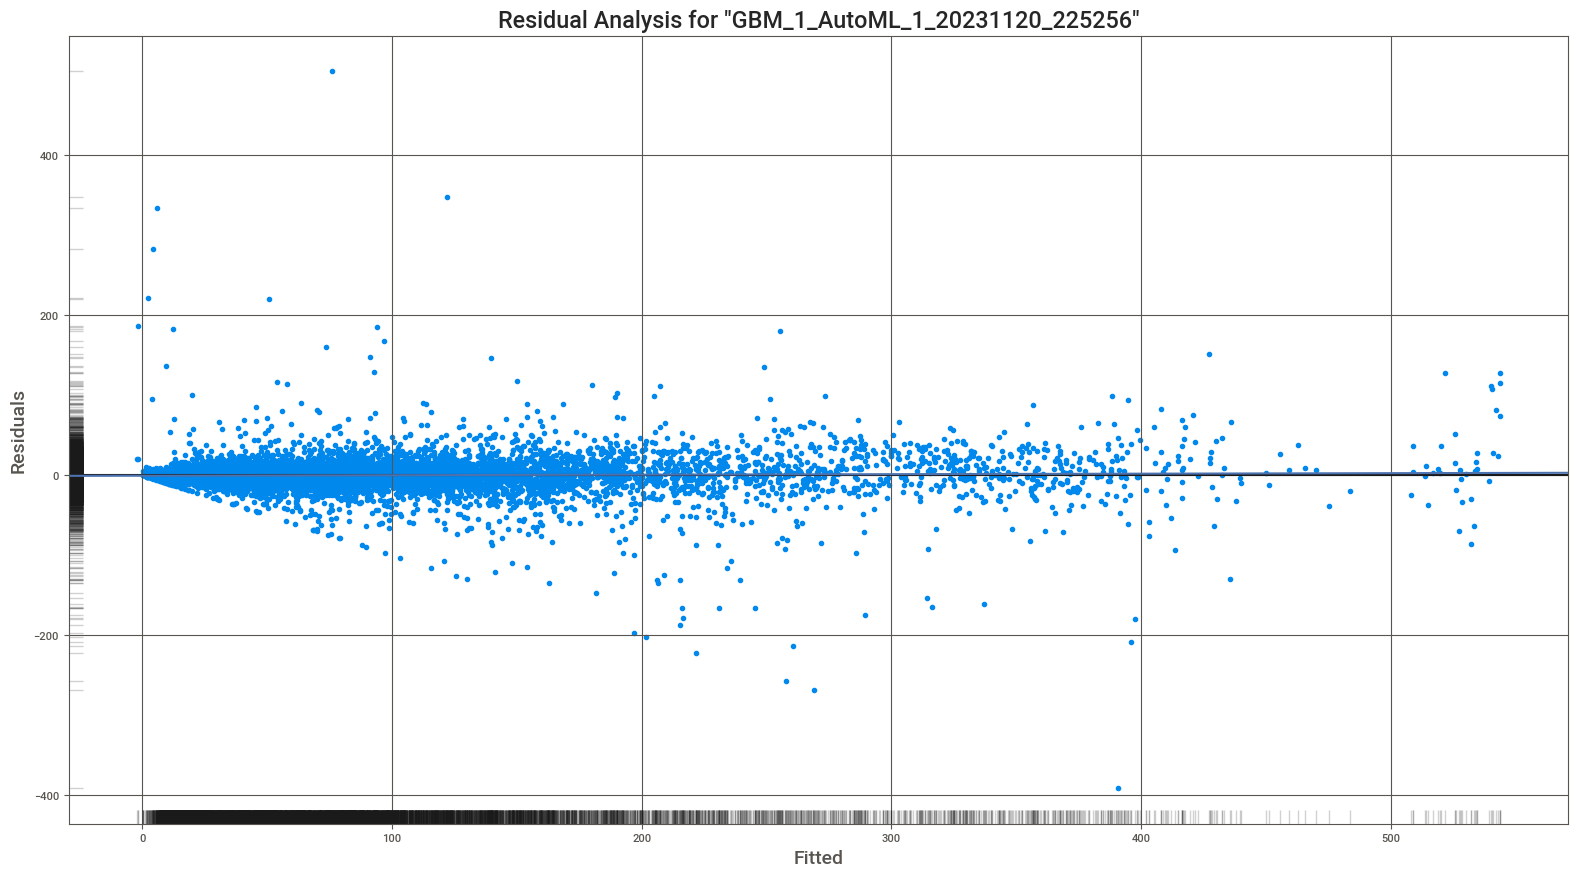

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

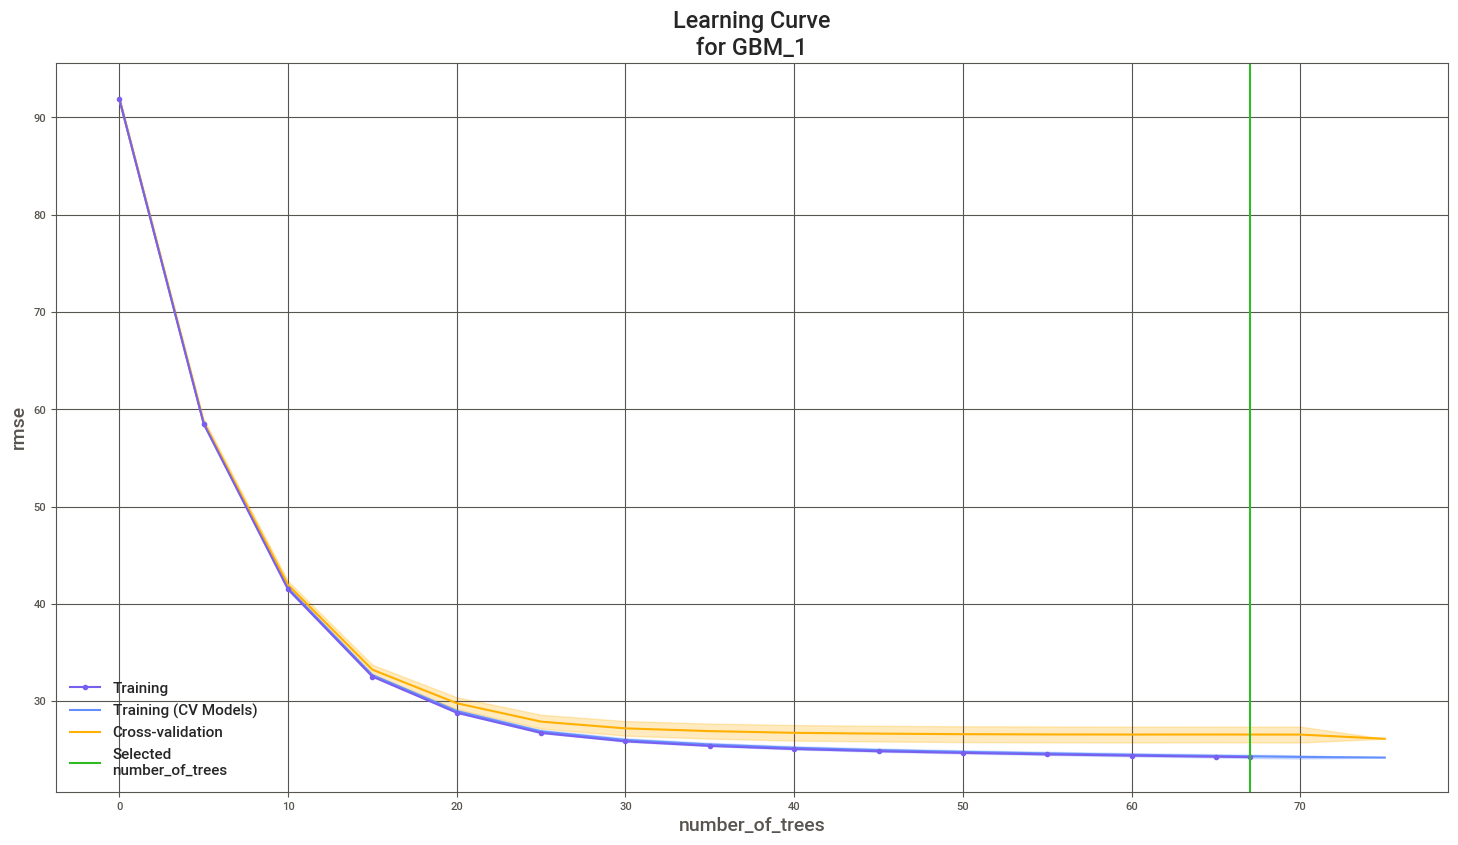

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

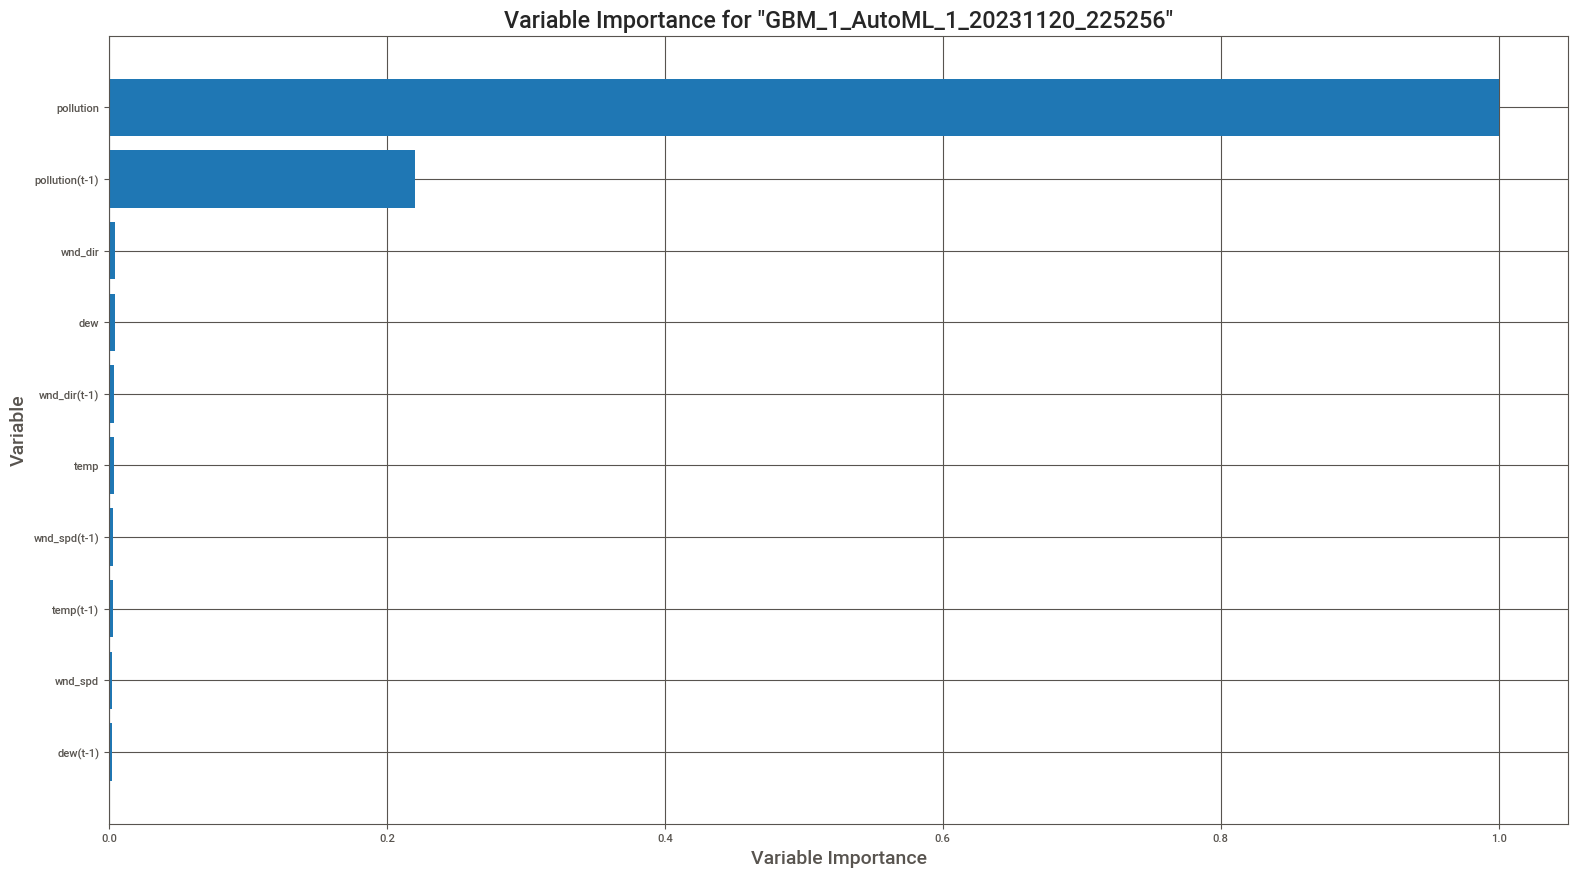

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

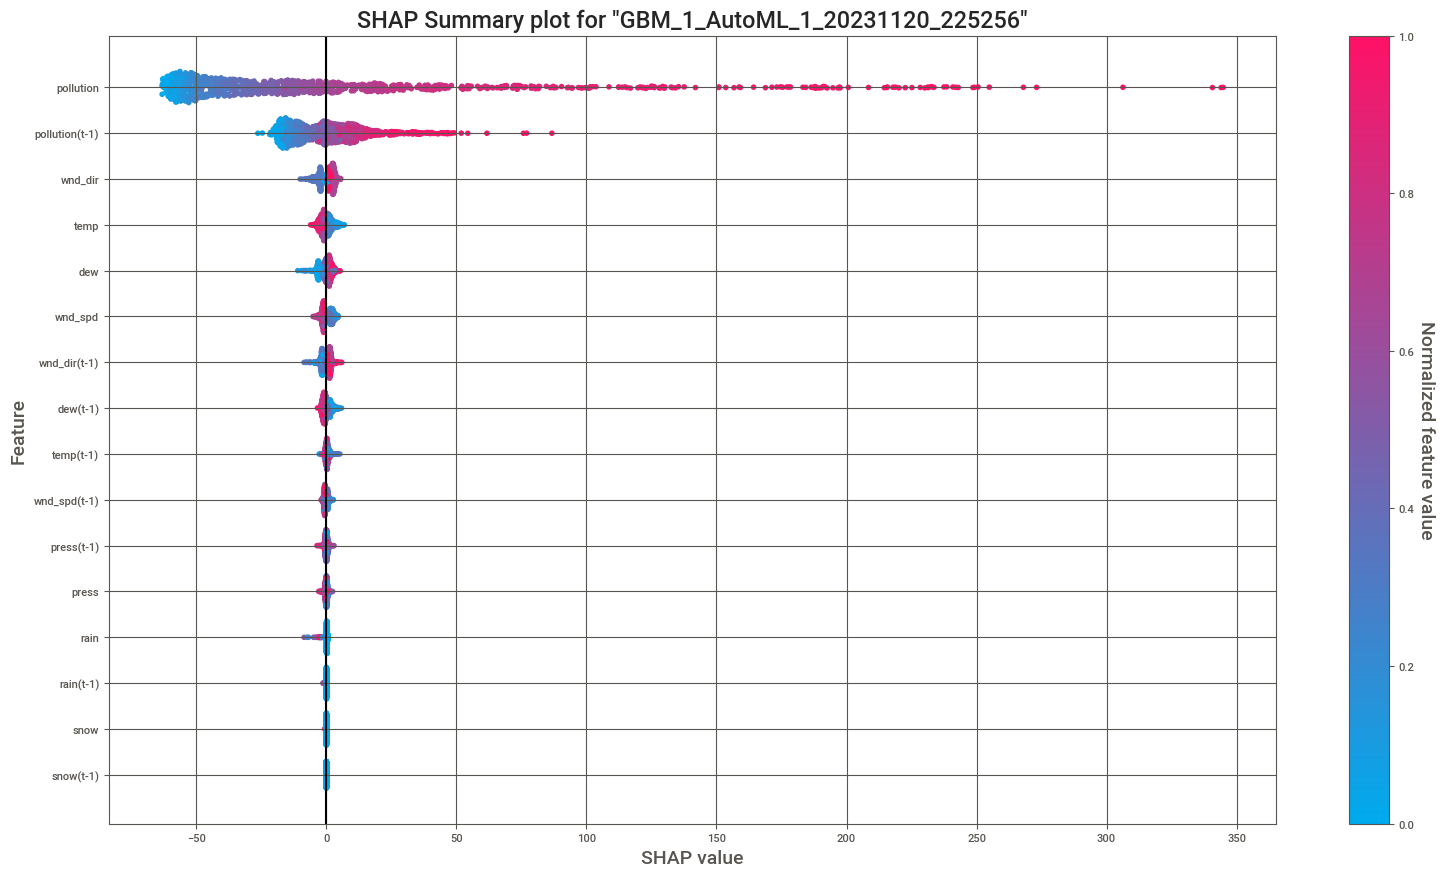

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

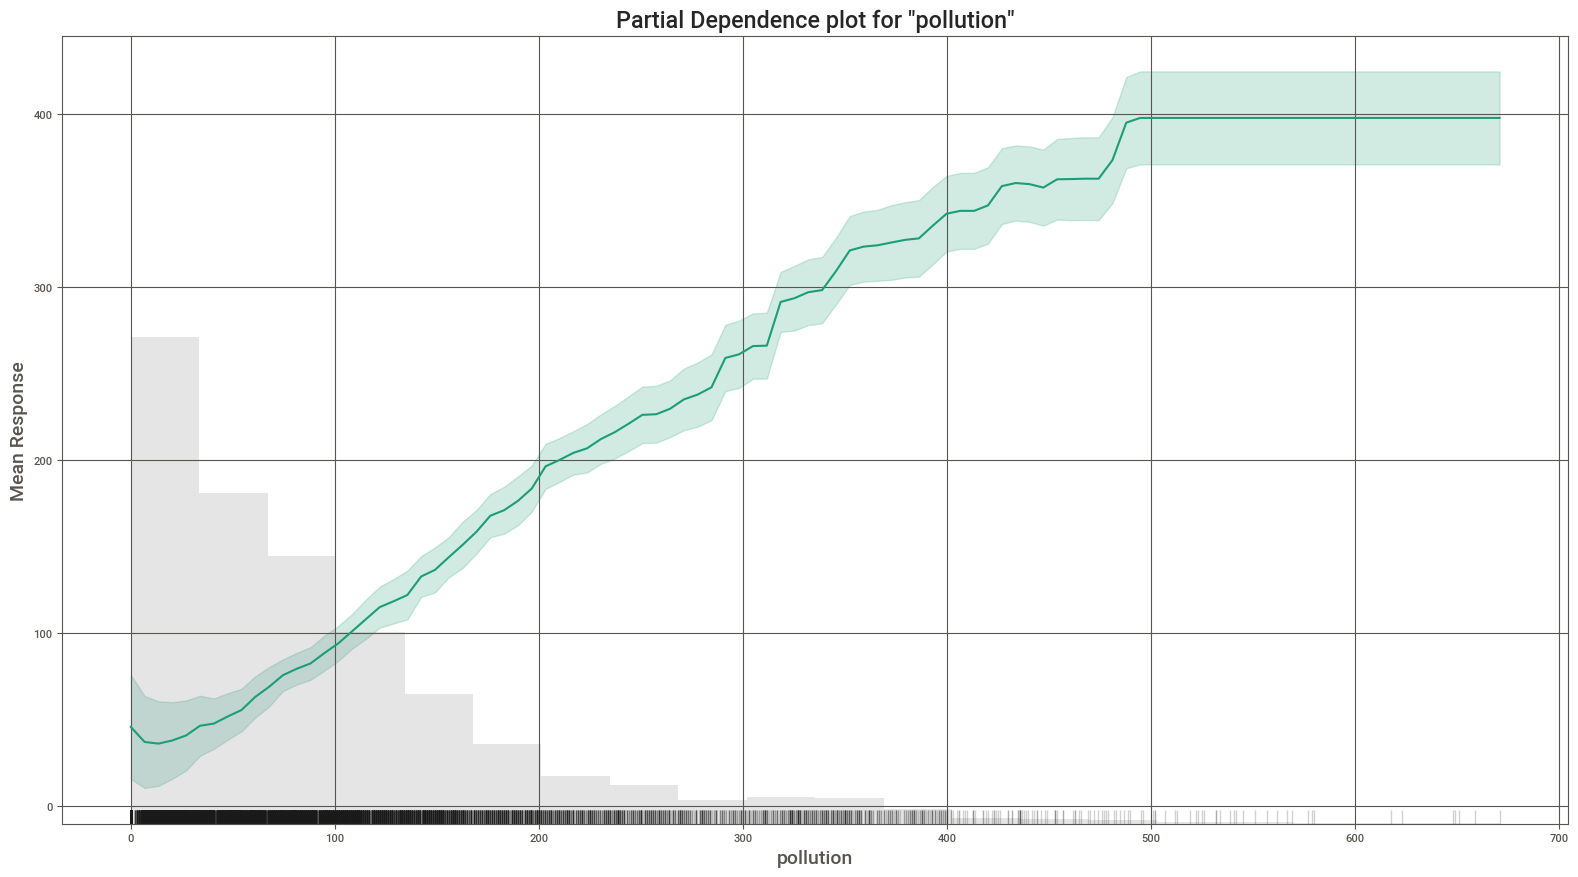

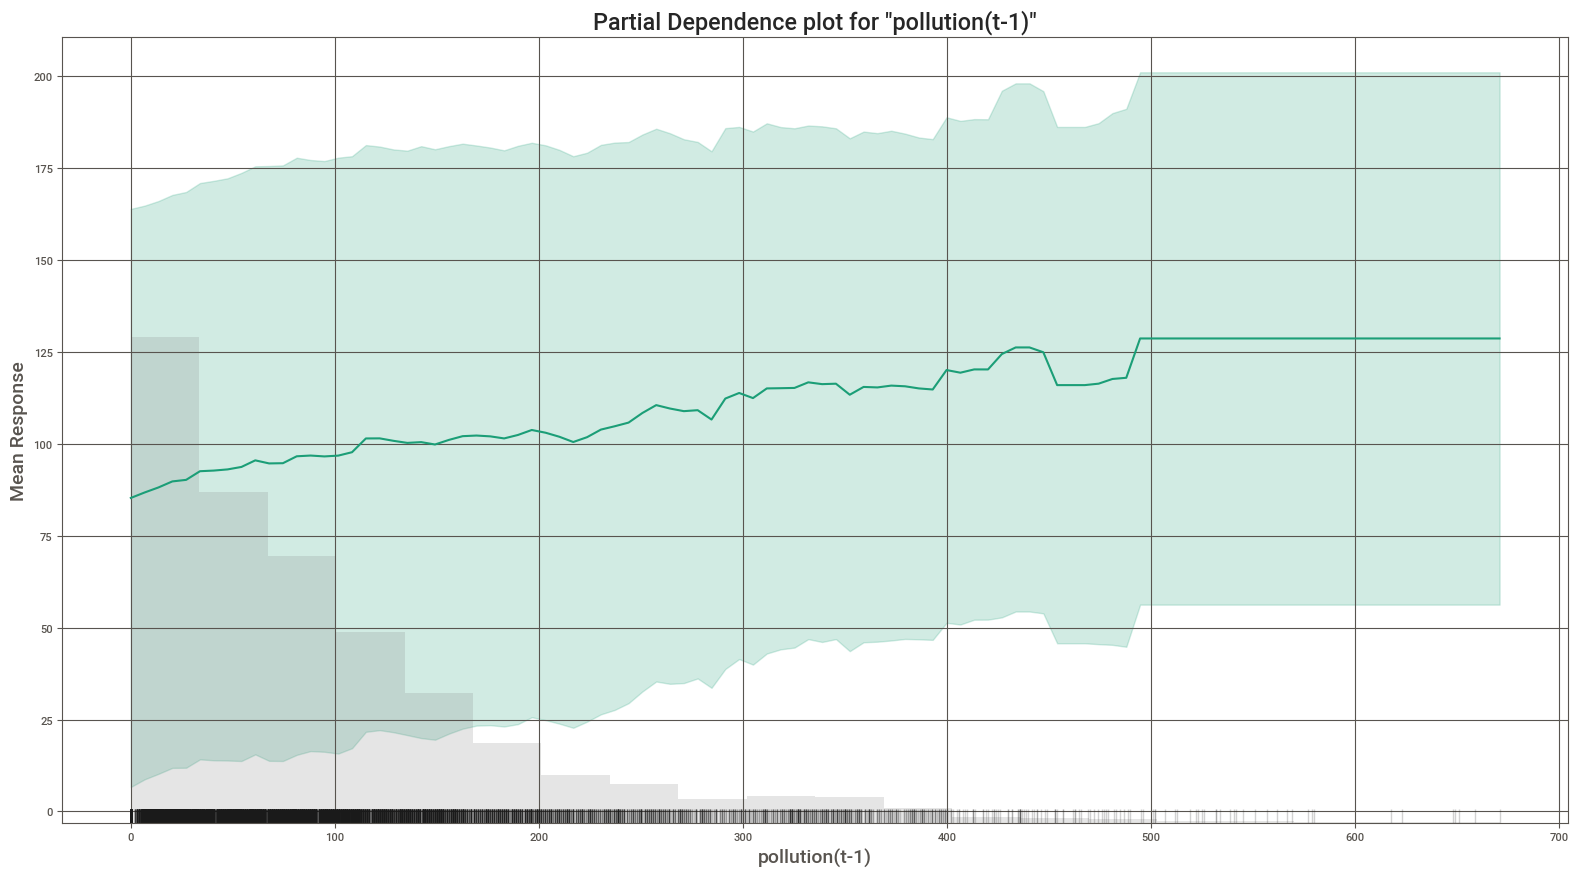

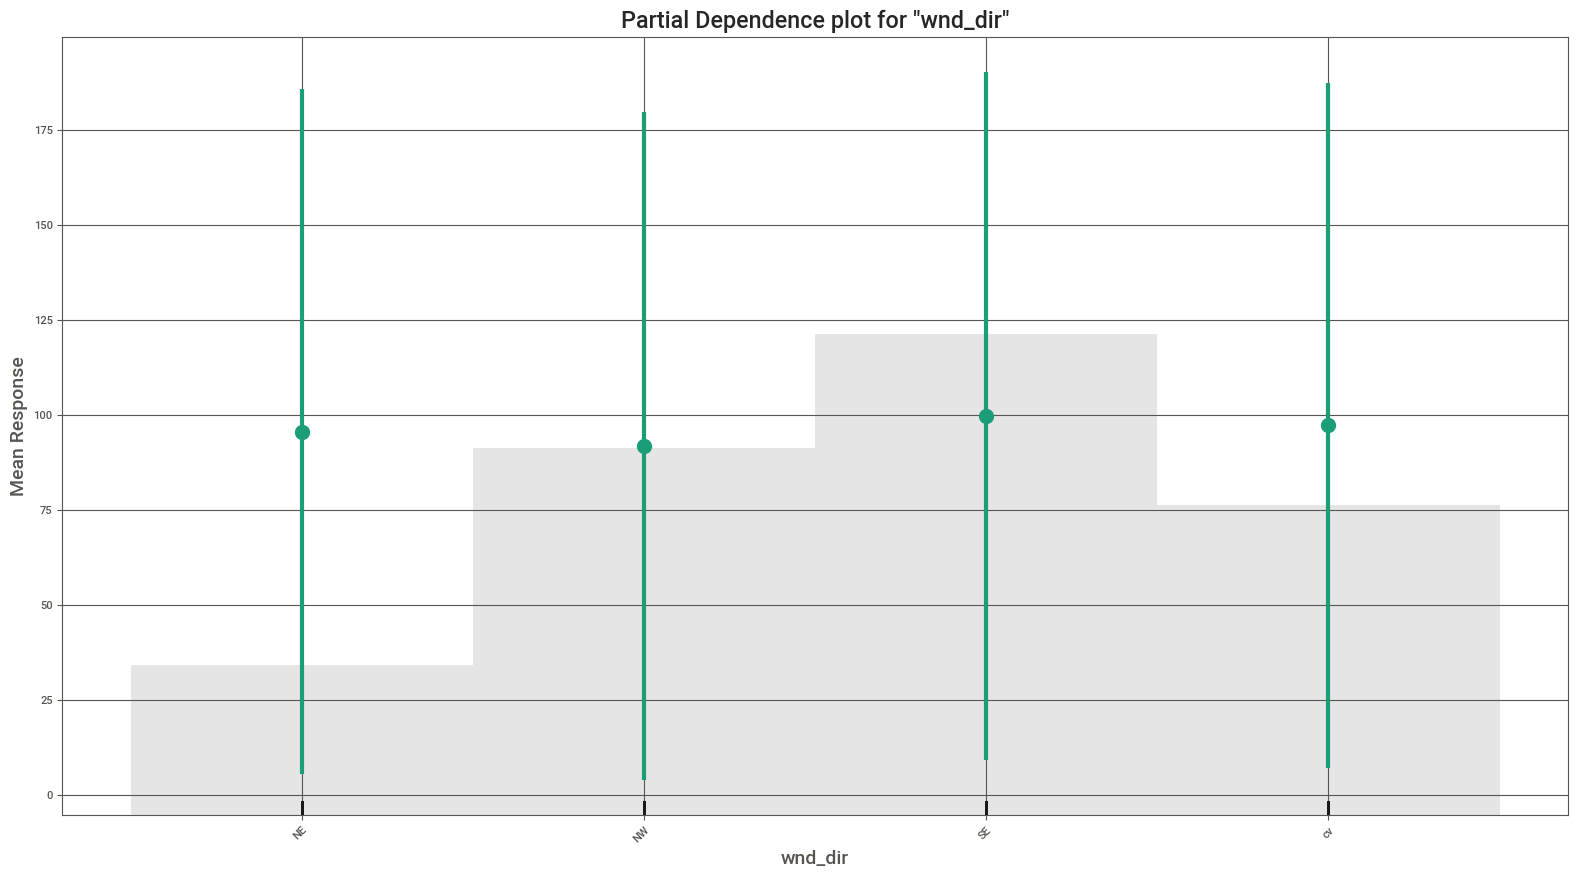

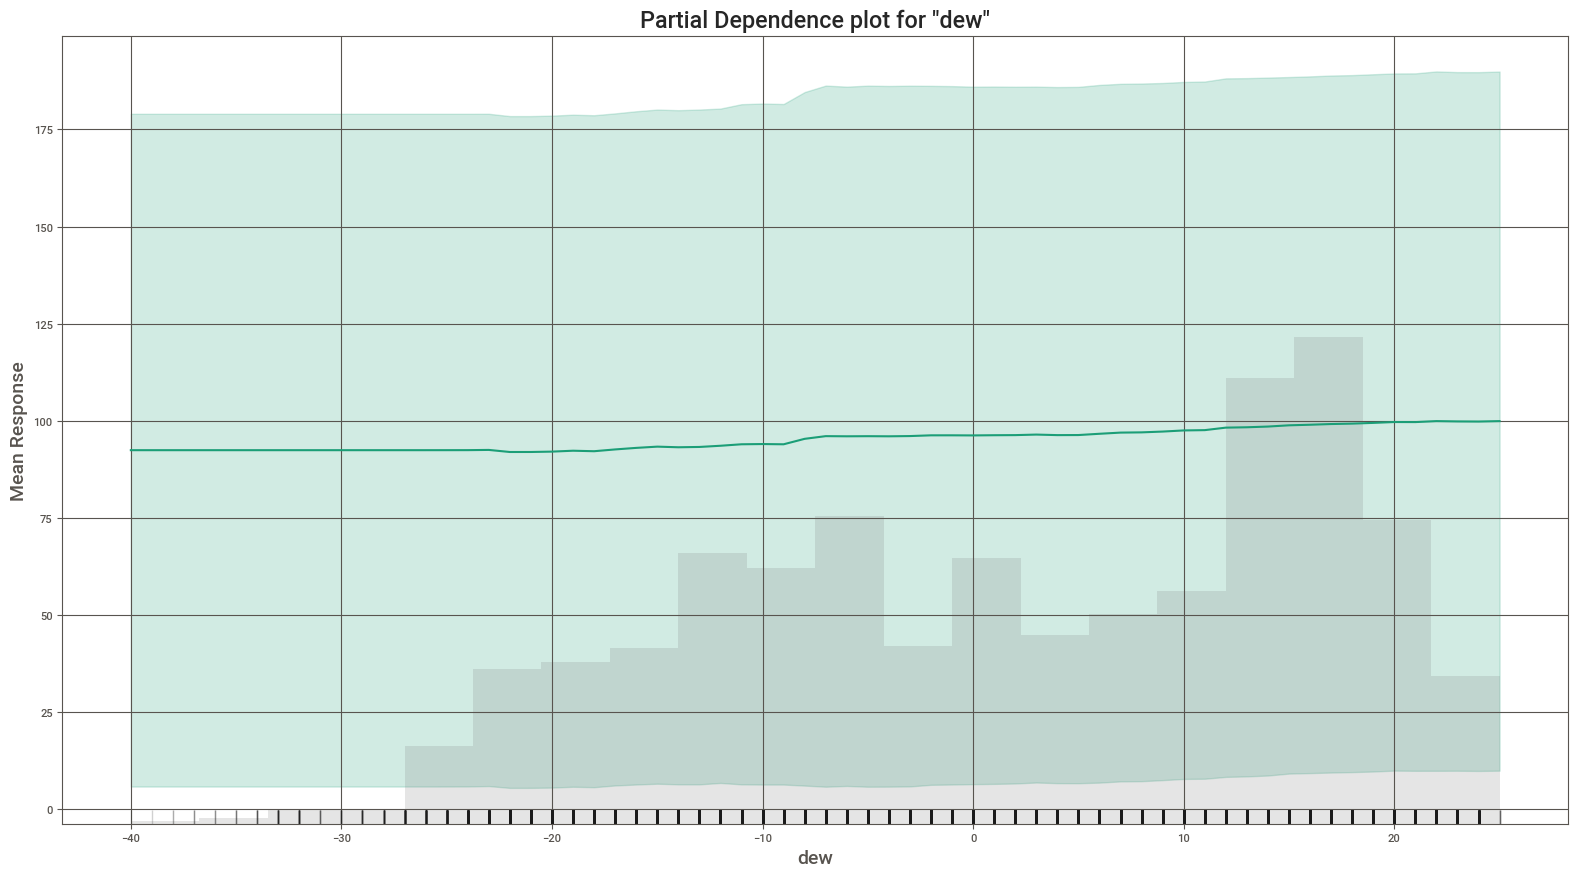

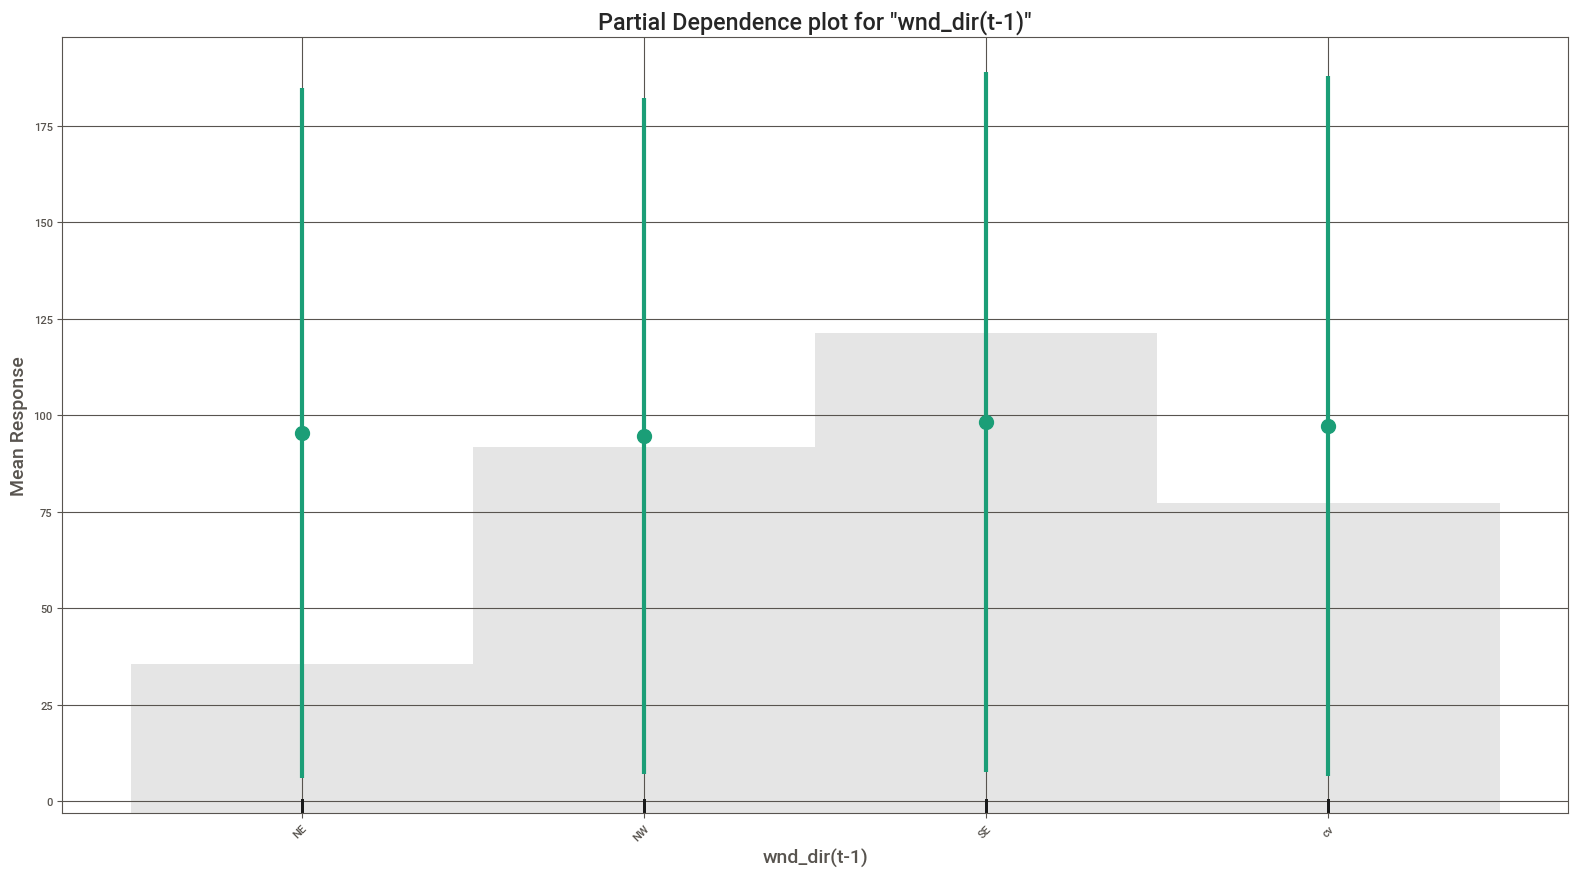

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

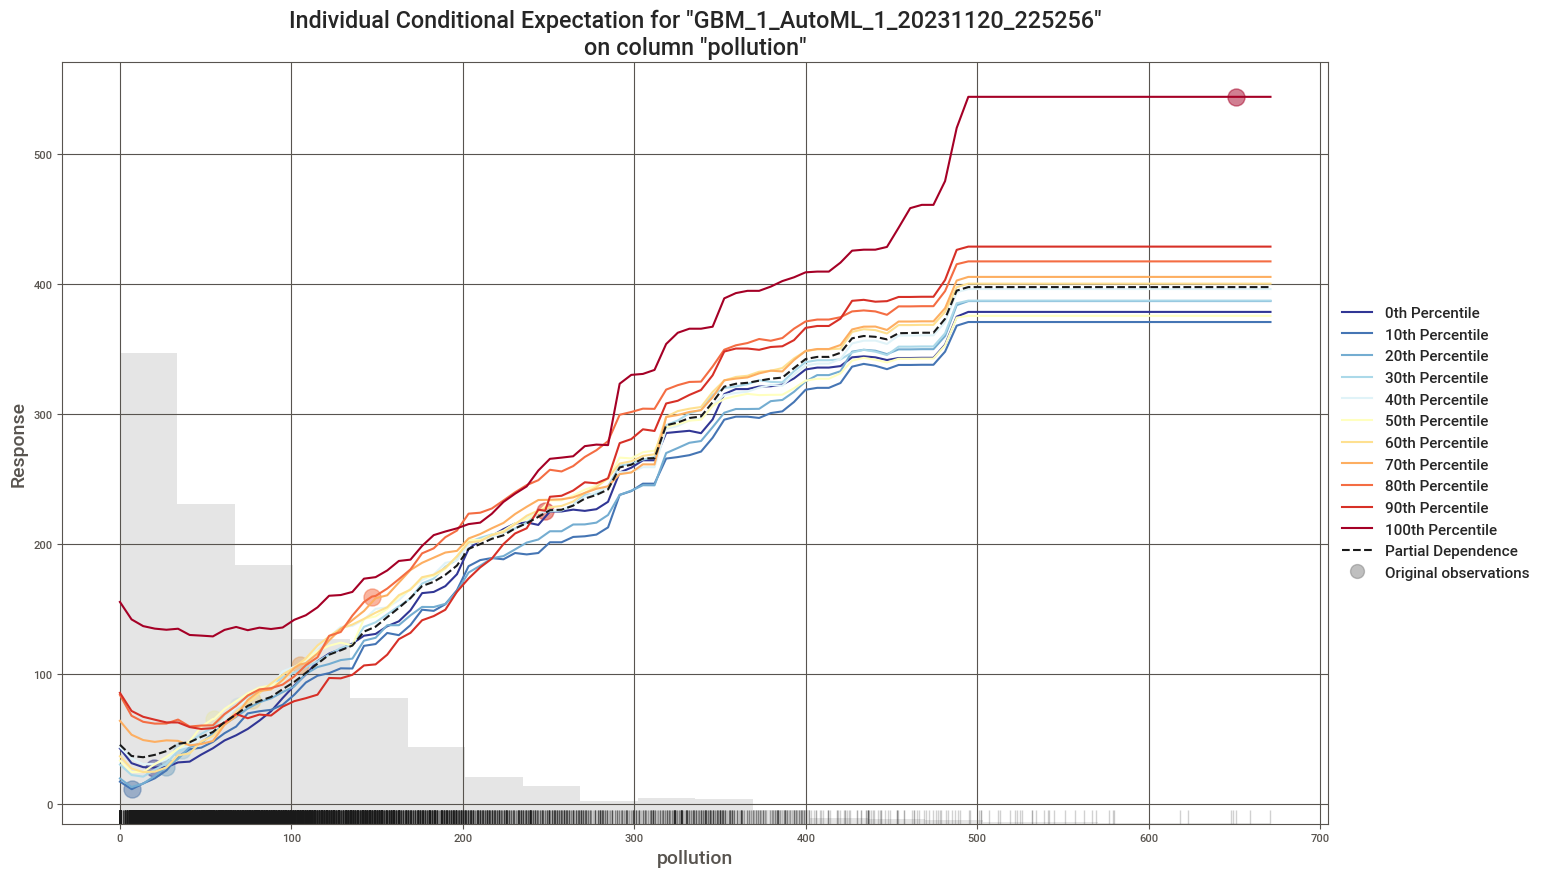

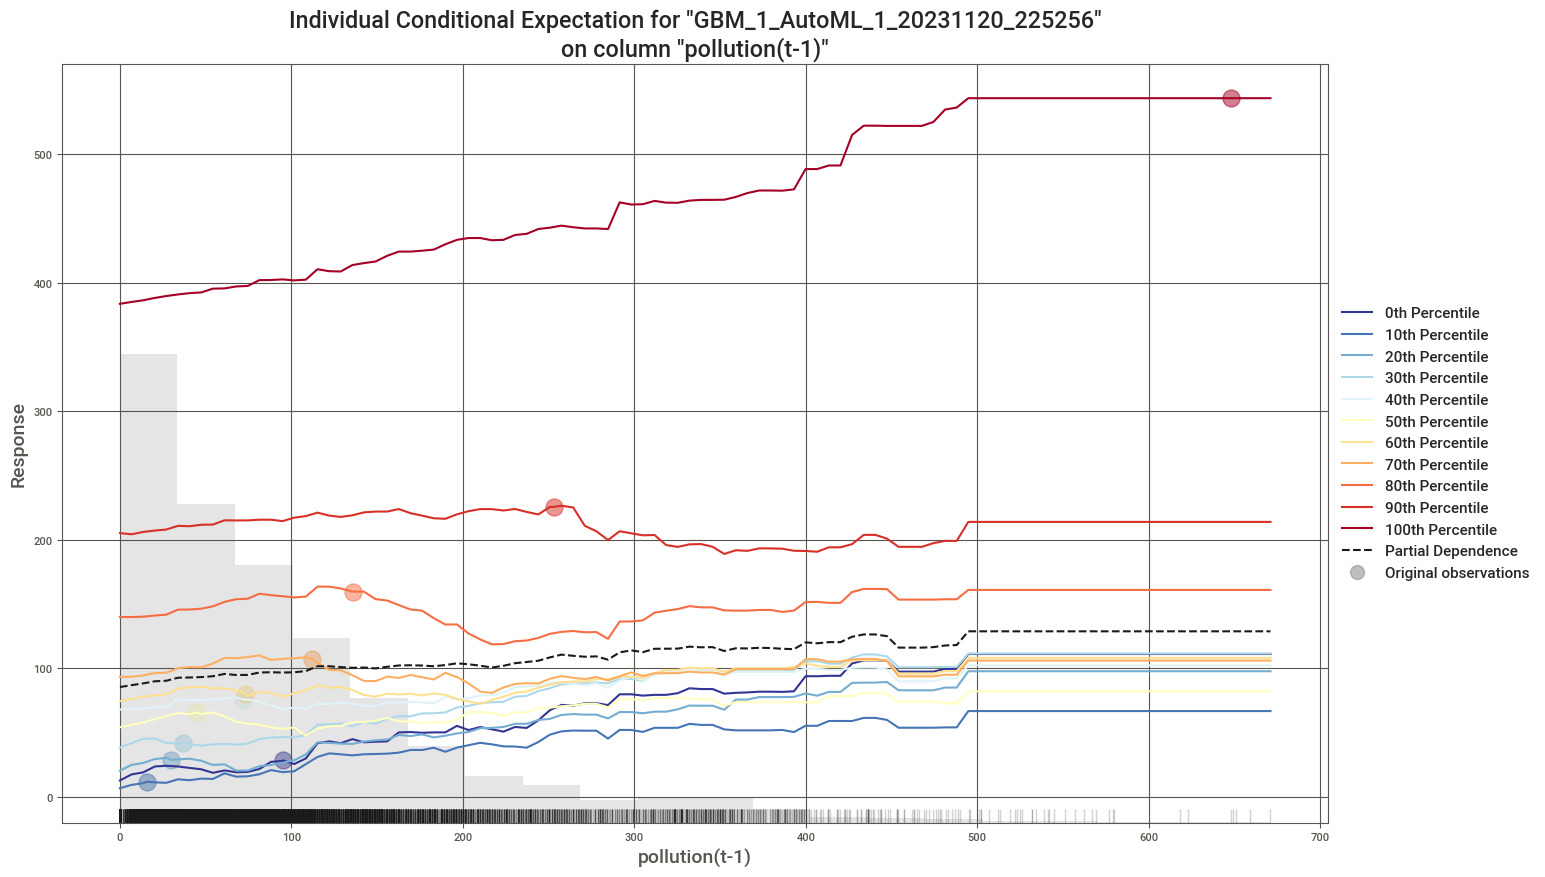

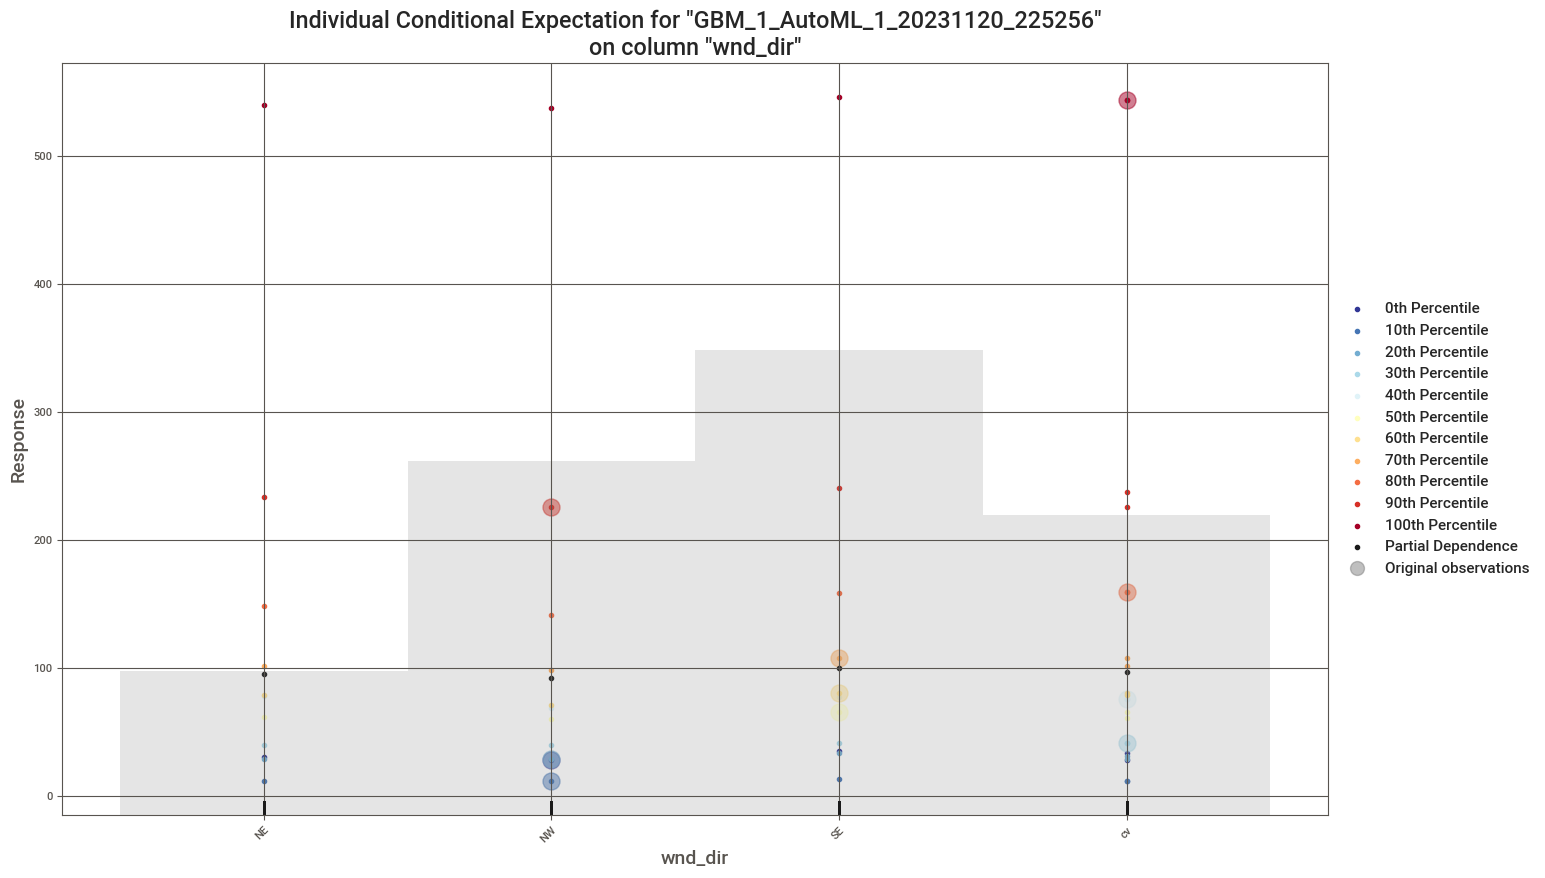

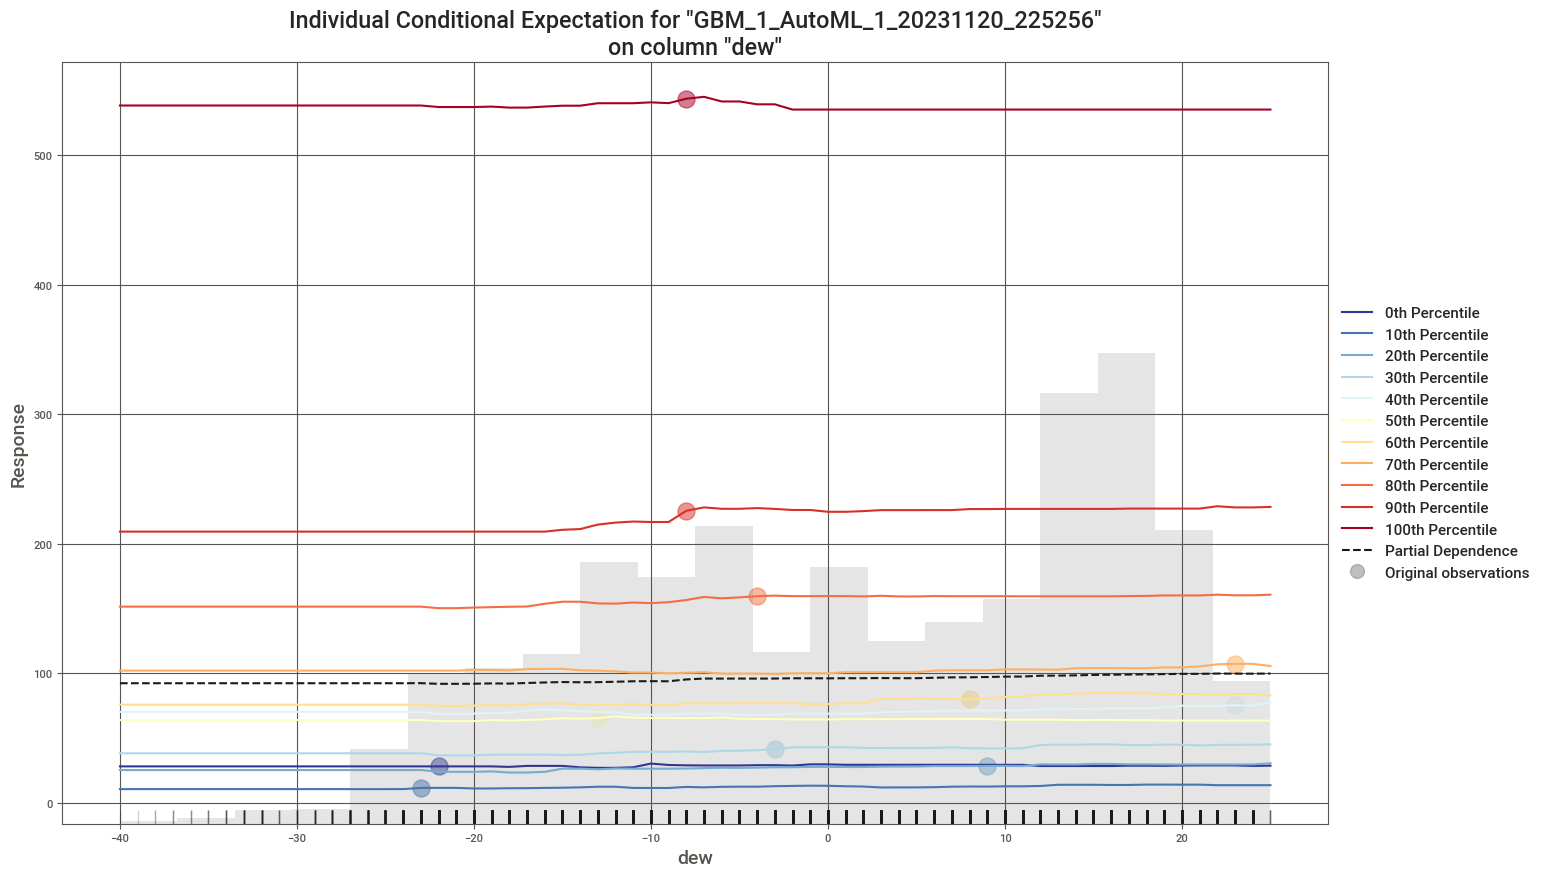

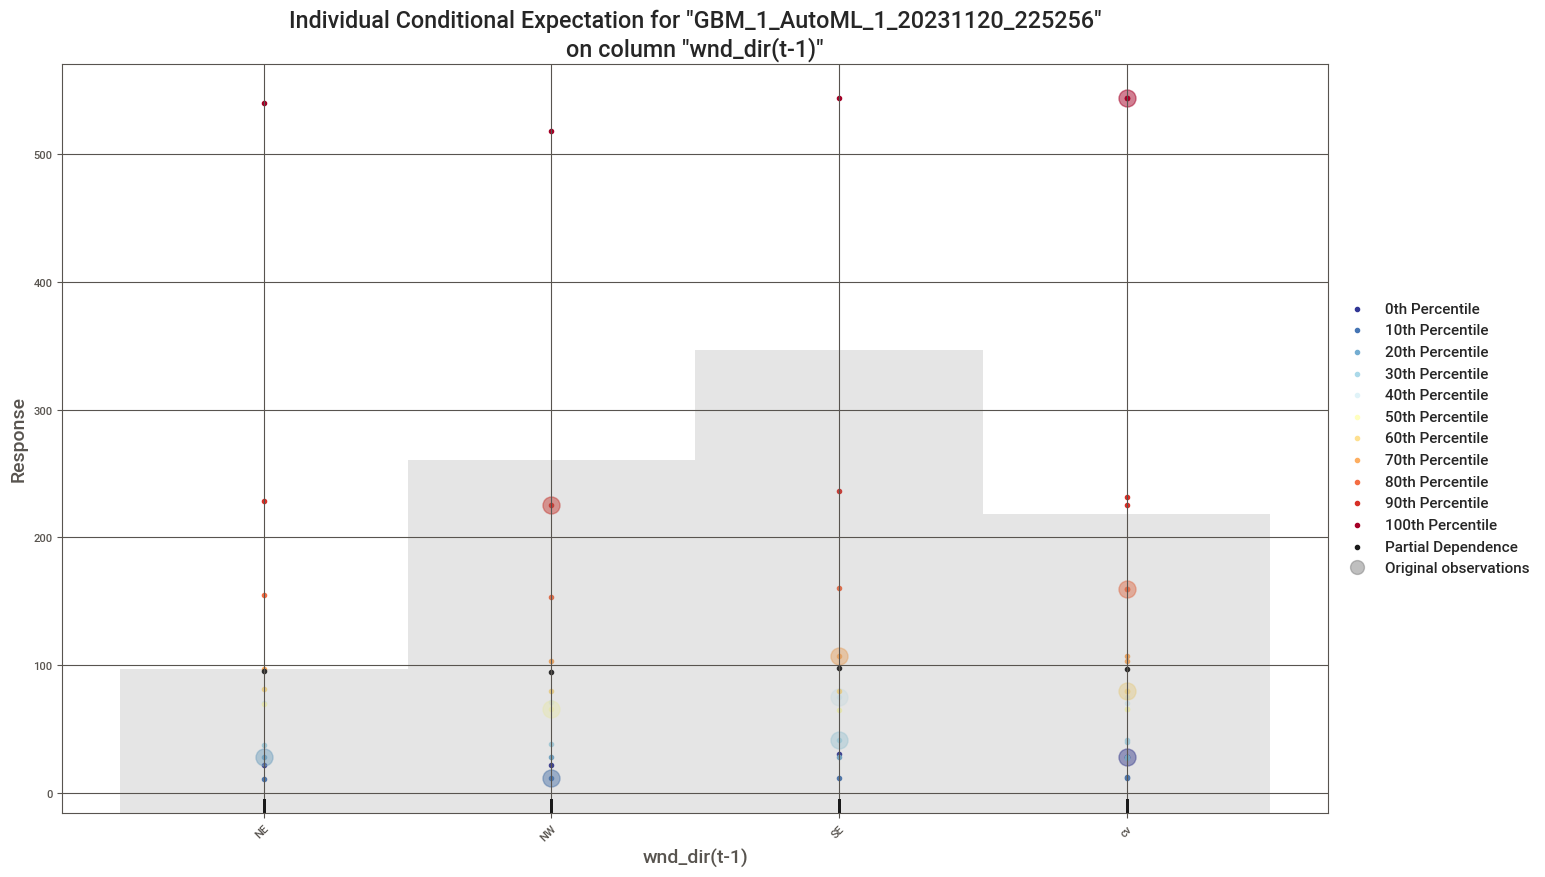

In [ ]:
# Explicación del modelo ganador
exm = aml.leader.explain(hf_test)

[Interpretación de los Gráficos](https://www.analyticsvidhya.com/blog/2021/02/unboxing-h2o-automl-models/)

In [ ]:
# Cálculo del R2
slope, intercept, r_value, p_value, std_err = stats.linregress(x=df_results['predictions'],y=df_results['ground_truth'])
print('R2 = ',r_value*r_value)

R2 =  0.9382980027223254


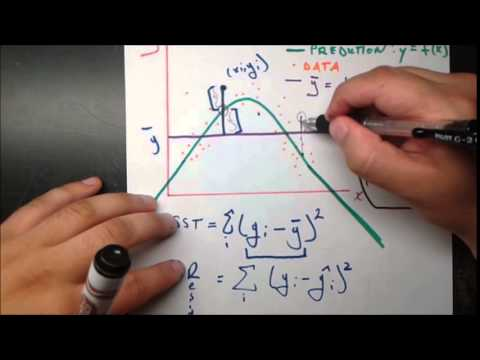

In [ ]:
# Explicación del R2
YouTubeVideo('g2ext963IZg')
# https://www.youtube.com/watch?v=g2ext963IZg

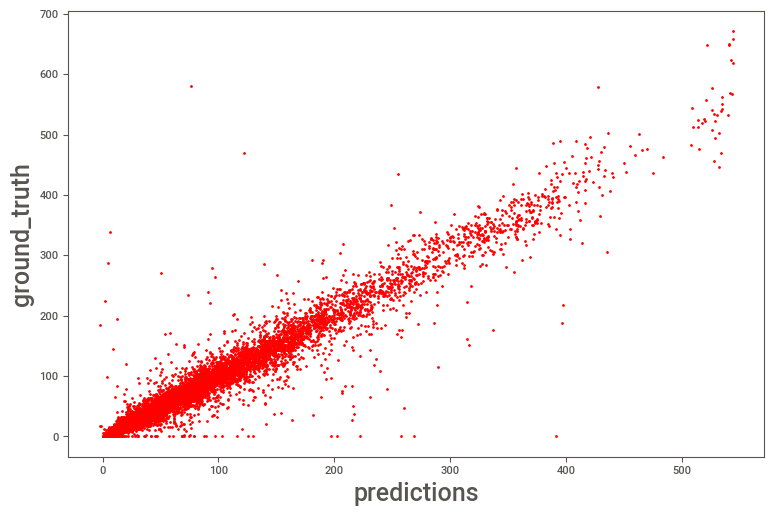

In [ ]:
# Gráfico de dispersión de las predciones y los valores reales
plt.scatter(x=df_results['predictions'],y=df_results['ground_truth'],s=1,c='red')
plt.xlabel('predictions',fontsize=18)
plt.ylabel('ground_truth',fontsize=18)
plt.show()

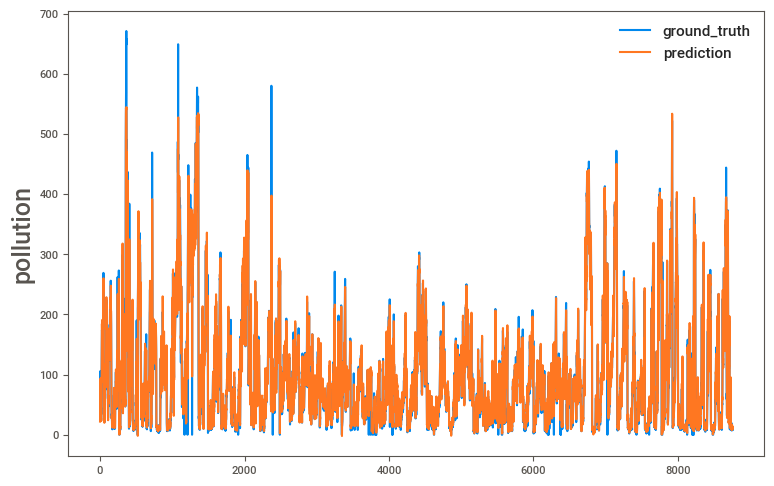

In [ ]:
# Gráfico de las predicciones junto con los valores reales
plt.plot(df_results['ground_truth'])
plt.plot(df_results['predictions'])
plt.ylabel('pollution',fontsize=18)
plt.legend(['ground_truth','prediction'])
plt.show()

En este caso usamos la librería H2O. Existen otras librerías de AutoML ([ver artículo para más detalle](https://www.linkedin.com/pulse/top-10-automated-machine-learningauto-ml-tools-used-2020-2021-sahu/?trackingId=wwK1%2FFnjSkSqy%2BDWuM0Q%2Bg%3D%3D)), como así también liberías de AutoML específicas para Series de tiempo como [AutoTS](https://winedarksea.github.io/AutoTS/build/html/index.html).